<a href="https://colab.research.google.com/github/leobordo/SNA_StackOverflow/blob/main/SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualizzazione del grafo

## Spring Layout
Gli archi sono come molle e i nodi come dei massi. L'idea è che una molla si contrae, cioè avvicina due massi, se questi sono connessi tra loro e si allontana se non lo sono. Il layout cerca di trovare una mappatura 2D che equilibri il più possibile le forze delle molle.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Caricare i dati
file_path = '/content/drive/MyDrive/progetto 2 data science/stack_network_links.csv'
network_data = pd.read_csv(file_path)

# Creazione del grafo con NetworkX
def visualize_sna_with_networkx(data):
    G = nx.Graph()

    # Aggiunge nodi e archi
    for _, row in data.iterrows():
        G.add_edge(row['source'], row['target'], weight=row['value'])

    # Disegna il grafo con spring layout
    pos = nx.spring_layout(G, seed=42, k=0.6)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(16, 16))

    # Nodi colorati in base al grado
    degrees = dict(G.degree())
    node_colors = list(degrees.values())
    cmap = plt.cm.viridis
    norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))

    # Mostra solo le etichette dei nodi con grado maggiore di una soglia
    label_threshold = 6
    labels = {node: node if degree > label_threshold else '' for node, degree in degrees.items()}

    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=[v * 25 for v in degrees.values()],
        node_color=node_colors,
        cmap=cmap,
        alpha=0.9
    )

    # Disegna archi
    nx.draw_networkx_edges(
        G, pos,
        width=[weights[edge] / 15 for edge in G.edges()],
        alpha=0.6,
        edge_color='gray'
    )

    # Etichette dei nodi (filtrate)
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

    # Aggiunge legenda
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(node_colors)  # Collega i valori dei nodi alla barra del colore
    cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.8)
    cbar.set_label("Grado del nodo")

    plt.title("Social Network Analysis con NetworkX", fontsize=16)
    plt.axis('off')
    plt.show()

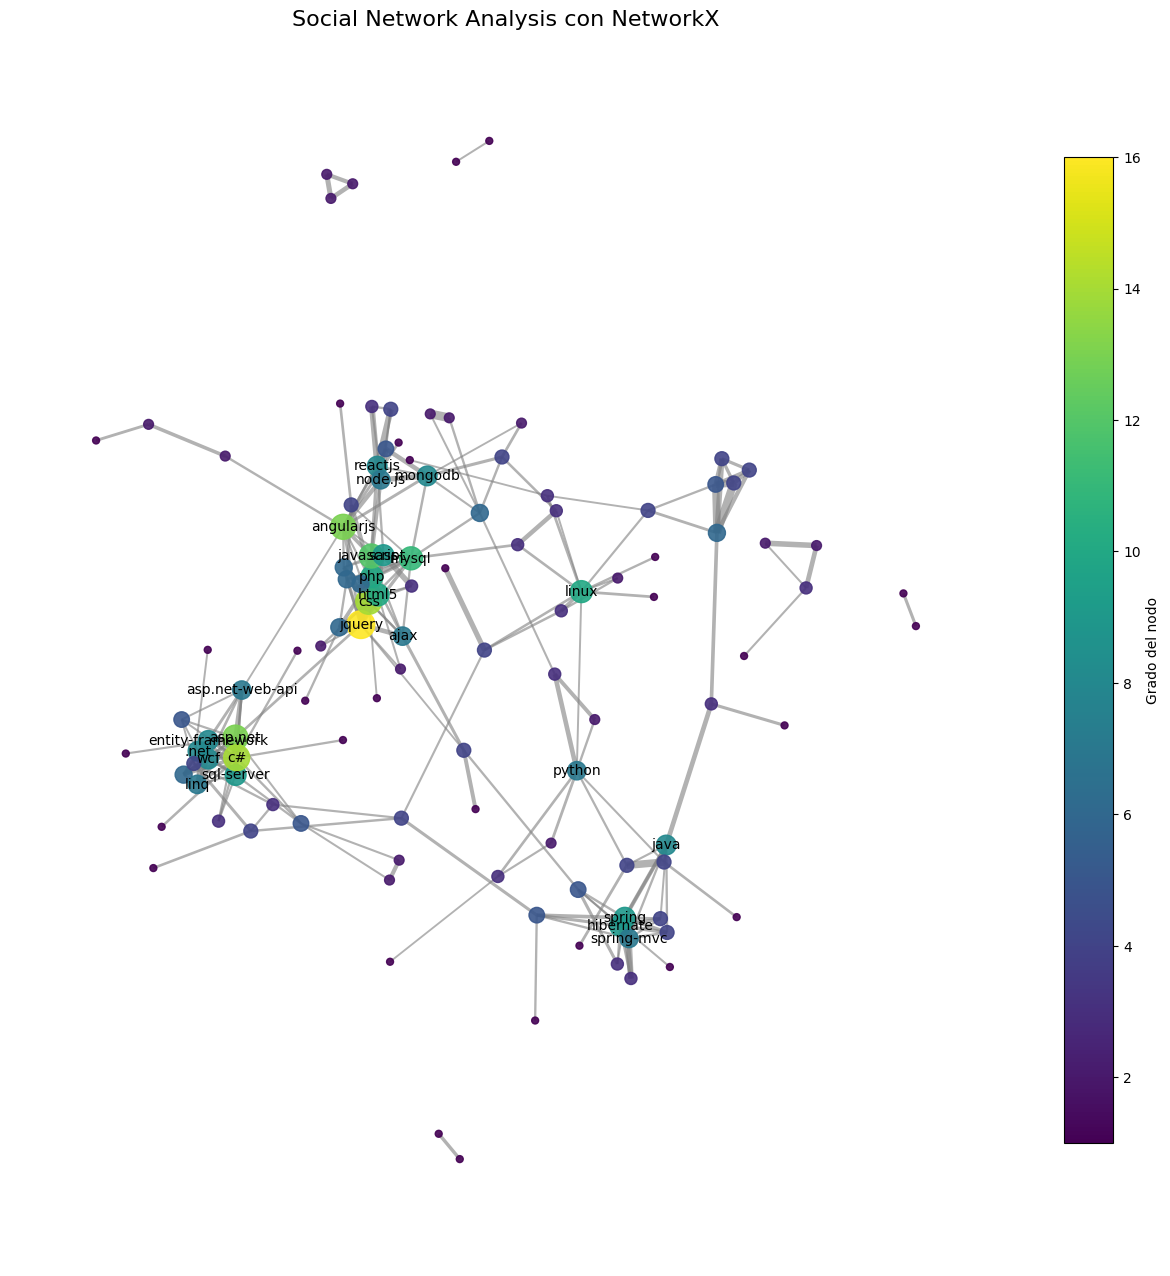

In [ ]:
visualize_sna_with_networkx(network_data)

## Circular Layout
Dispone i nodi in un layout il più possibile circolare

In [ ]:
# Funzione per visualizzare con shell layout
def visualize_with_circular_layout(data):
    G = nx.Graph()


    for _, row in data.iterrows():
        G.add_edge(row['source'], row['target'], weight=row['value'])

    # Disegna il grafo con shell layout
    pos = nx.circular_layout(G)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(16, 16))

    # Nodi colorati in base al grado
    degrees = dict(G.degree())
    node_colors = list(degrees.values())
    cmap = plt.cm.viridis
    norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))

    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=[v * 30 for v in degrees.values()],
        node_color=node_colors,
        cmap=cmap,
        alpha=0.9
    )

    # Disegna archi
    nx.draw_networkx_edges(
        G, pos,
        width=[weights[edge] / 10 for edge in G.edges()],
        alpha=0.6,
        edge_color='gray'
    )

    label_threshold = 3  # Mostra etichette solo per nodi importanti
    labels = {node: node if degree > label_threshold else '' for node, degree in degrees.items()}

    # Etichette dei nodi
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

    # Aggiunge legenda
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(node_colors)
    cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.8)
    cbar.set_label("Grado del nodo")

    plt.title("Social Network Analysis con Circular Layout", fontsize=16)
    plt.axis('off')
    plt.show()


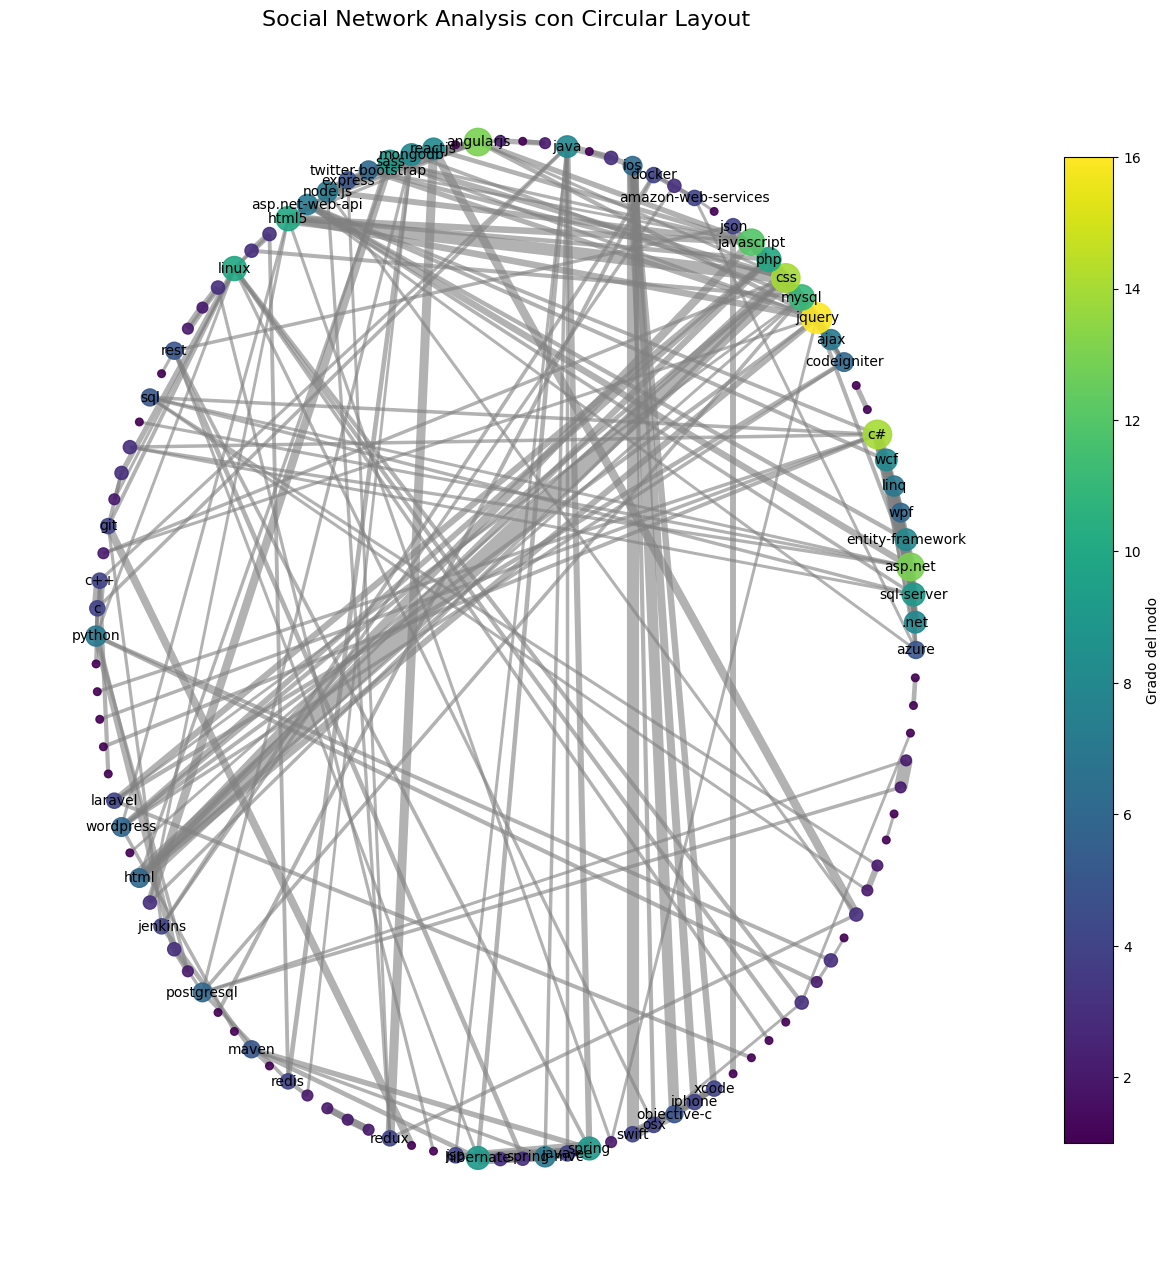

In [ ]:
visualize_with_circular_layout(network_data)

## Kawai-Kamada Layout
Si basa sul concetto di minimizzare la distanza fisica dei nodi in modo che rispecchi quella ideale, ovvero quella dettata dal cammino minimo che ne lega due

In [ ]:
# Funzione per visualizzare con Kamada-Kawai layout
def visualize_with_kamada_kawai_layout(data):
    G = nx.Graph()


    for _, row in data.iterrows():
        G.add_edge(row['source'], row['target'], weight=row['value'])

    # Disegna il grafo con Kamada-Kawai layout
    pos = nx.kamada_kawai_layout(G)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(16, 16))

    # Nodi colorati in base al grado
    degrees = dict(G.degree())
    node_colors = list(degrees.values())
    cmap = plt.cm.viridis
    norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))

    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=[v * 30 for v in degrees.values()],
        node_color=node_colors,
        cmap=cmap,
        alpha=0.9
    )

    # Disegna archi
    nx.draw_networkx_edges(
        G, pos,
        width=[weights[edge] / 10 for edge in G.edges()],
        alpha=0.6,
        edge_color='gray'
    )

    # Etichette dei nodi
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    # Aggiunge barra del colore
    sm = ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(node_colors)
    cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.8)
    cbar.set_label("Grado del nodo")

    plt.title("Social Network Analysis con Kamada-Kawai Layout", fontsize=16)
    plt.axis('off')
    plt.show()

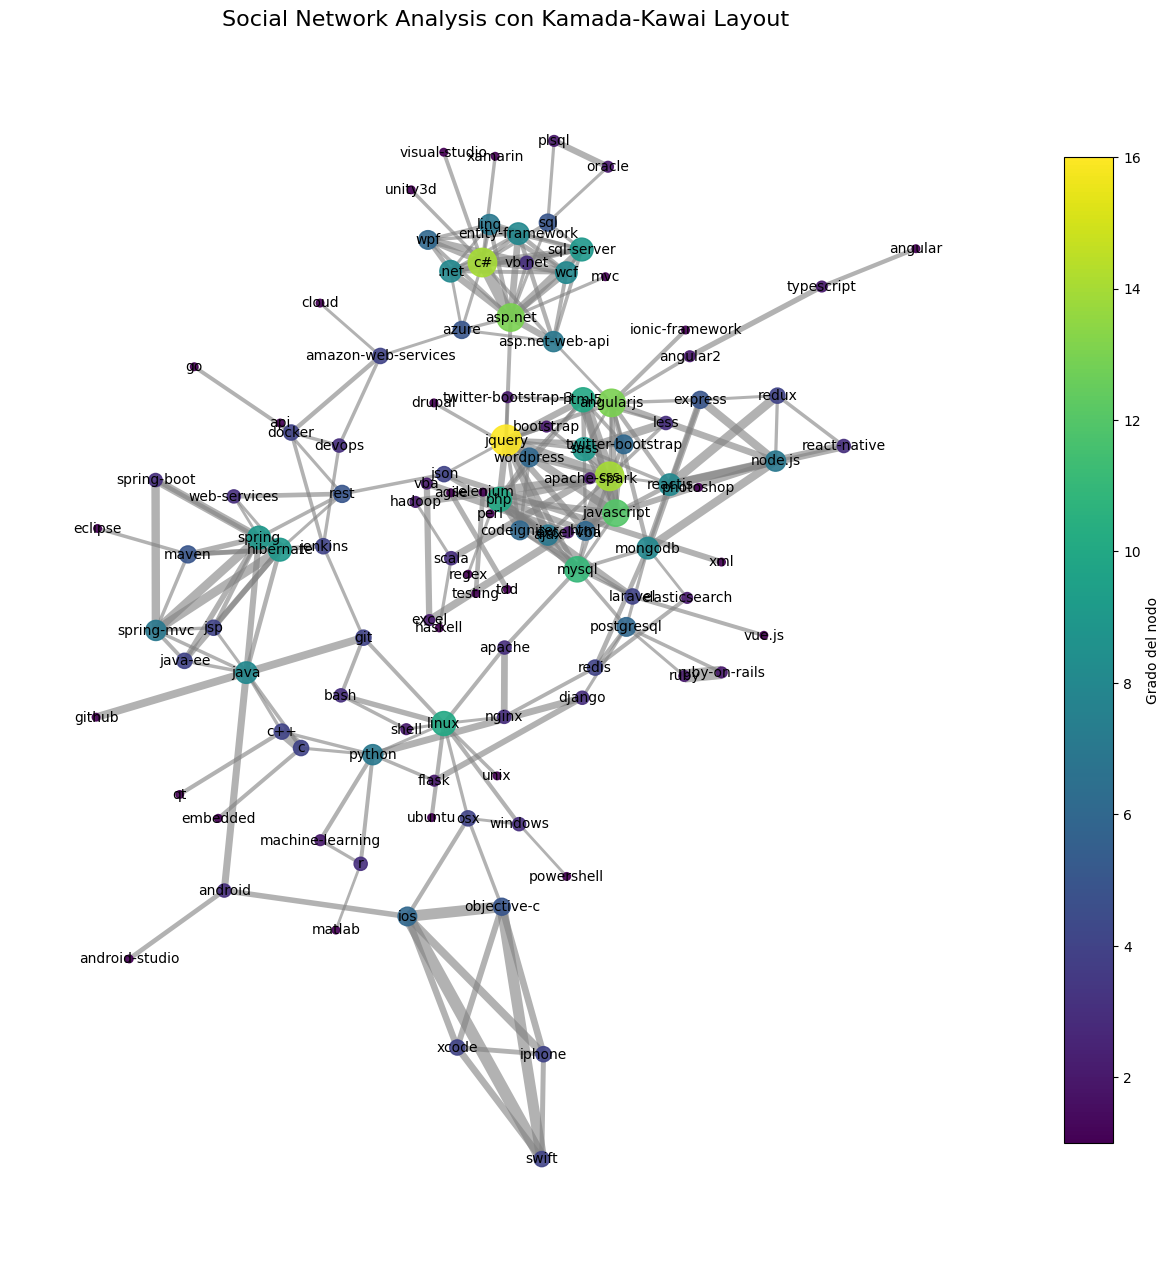

In [ ]:
visualize_with_kamada_kawai_layout(network_data)

# Analisi descrittiva della rete

Questa prima parte serve a mappare i nomi dei gruppi con gli ambiti a cui i tag fanno riferimento

In [ ]:
# Carica il CSV con i dati dei nodi
nodes_df = pd.read_csv('/content/drive/MyDrive/progetto 2 data science/stack_network_nodes.csv')

# Mappatura dei gruppi numerici ai nomi dei gruppi reali
group_mapping = {
    1: 'Linguaggi di programmazione',
    2: 'Framework e librerie',
    3: 'Tecnologie web',
    4: 'Piattaforme mobile',
    5: 'Strumenti di sviluppo',
    6: 'Front-end web development',
    7: 'Strumenti e piattaforme JavaScript',
    8: 'Tecnologie back-end',
    9: 'DevOps e Cloud',
    10: 'Big Data e Analisi',
    11: 'Testing e qualità del software',
    12: 'Metodologie di sviluppo',
    13: 'Altri strumenti e tecnologie',
    14: 'Software e applicazioni aziendali'
}

# Sostituisce i numeri dei gruppi con i nomi dei gruppi
nodes_df['group'] = nodes_df['group'].map(group_mapping)

# Salva il nuovo CSV con i nomi dei gruppi
nodes_df.to_csv('/content/drive/MyDrive/progetto 2 data science/stack_network_nodes_with_names.csv', index=False)

## Funzioni per analisi descrittiva

In [ ]:
import numpy as np


G = nx.Graph()

# Aggiungi gli archi al grafo
for _, row in network_data.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['value'])

# Carica il dataframe dei nodi
nodes_df = pd.read_csv('/content/drive/MyDrive/progetto 2 data science/stack_network_nodes_with_names.csv')

# Aggiungi i nodi e i loro attributi (group e nodesize) al grafo G
for _, row in nodes_df.iterrows():
    if row['name'] not in G:
        G.add_node(row['name'])  # Se il nodo non esiste, aggiunge
    G.nodes[row['name']]['group'] = row['group']  # Aggiunge il gruppo del nodo
    G.nodes[row['name']]['nodesize'] = row['nodesize']  # Aggiunge il nodesize del nodo

# Funzione per mostrare la tabella
def show_table(data, title, column_names):

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('off')


    header_color = '#A7C7E7'  # Celeste chiaro

    # Crea la tabella
    table = ax.table(cellText=data,
                    colLabels=column_names,
                    loc='center',
                    cellLoc='center',
                    colColours=[header_color] * len(column_names))  # Colora le celle degli header


    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Scala la tabella per adattarla meglio


    plt.title(title, fontsize=14, fontweight='bold', pad=20)

    plt.show()

Mostra Nodi e Archi

In [ ]:
def show_node_edge_count(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Crea la tabella
    data = [['Numero di nodi', num_nodes],
            ['Numero di archi', num_edges]]

    # Usa la funzione show_table per creare la tabella
    show_table(data, "Numero di Nodi e Archi", ['Statistiche', 'Valore'])


Mostra Grado Medio dei nodi

In [ ]:
def show_avg_degree(G):
    num_nodes = G.number_of_nodes()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes


    data = [['Grado medio dei nodi', avg_degree]]


    show_table(data, "Grado Medio dei Nodi", ['Statistiche', 'Valore'])


Mostra stats sui pesi degli archi

In [ ]:
def show_edge_weights(G):
    edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    avg_weight = sum(edge_weights) / len(edge_weights)


    data = [['Peso minimo degli archi', min_weight],
            ['Peso massimo degli archi', max_weight],
            ['Peso medio degli archi', avg_weight]]


    show_table(data, "Pesi degli Archi", ['Statistiche', 'Valore'])


Mostra distribuzione dei gruppi di nodi

In [ ]:
def show_group_distribution(nodes_df):
    group_counts = nodes_df['group'].value_counts()
    data = group_counts.reset_index().values.tolist()


    show_table(data, "Distribuzione dei Nodi per Gruppo", ['Gruppo', 'Numero di Nodi'])


Mostra i 3 gruppi con più nodi

In [ ]:
def show_top_3_groups(nodes_df):
    group_counts = nodes_df['group'].value_counts().head(3)
    data = group_counts.reset_index().values.tolist()

    show_table(data, "I 3 Gruppi con Più Nodi", ['Gruppo', 'Numero di Nodi'])


Mostra i 5 tag più usati

In [ ]:
def show_top_5_tags(nodes_df):
    top_5_tags = nodes_df[['name', 'nodesize']].sort_values(by='nodesize', ascending=False).head(5)
    data = top_5_tags.values.tolist()

    show_table(data, "I 5 Tag Più Usati", ['Tag', 'Nodesize'])


Mostra la distribuzione dei tag

In [ ]:
def show_group_distribution(nodes_df):
    # Raggruppa per 'group' e somma i 'nodesize' per ogni gruppo
    group_distribution = nodes_df.groupby('group')['nodesize'].sum().reset_index()
    group_distribution = group_distribution.sort_values(by='nodesize', ascending=False).head(10)
    data = group_distribution.values.tolist()

    show_table(data, "Distribuzione dei tag per Gruppo", ['Gruppo', 'Numero di Nodesize'])



Mostra i tag meno frequenti

In [ ]:
def show_least_frequent_tags(nodes_df):
    least_frequent_tags = nodes_df[['name', 'nodesize']].sort_values(by='nodesize').head(5)
    data = least_frequent_tags.values.tolist()

    show_table(data, "I Tag Meno Frequenti", ['Tag', 'Nodesize'])


Mostra il tag più usato

In [ ]:
def show_max_nodesize_tag(nodes_df):
    max_nodesize_tag = nodes_df.loc[nodes_df['nodesize'].idxmax()]
    show_table([[max_nodesize_tag['name'], max_nodesize_tag['nodesize']]], "Il Nodo con il Massimo 'Nodesize'", ['Tag', 'Nodesize'])


Mostra il gruppo con il maggior nuemero di archi interni

In [ ]:
def show_internal_edges(G, nodes_df):
    internal_edges = {group: 0 for group in nodes_df['group'].unique()}

    for u, v, data in G.edges(data=True):
        group_u = G.nodes[u]['group']
        group_v = G.nodes[v]['group']
        if group_u == group_v:
            internal_edges[group_u] += 1

    sorted_internal_edges = sorted(internal_edges.items(), key=lambda item: item[1], reverse=True)
    data = sorted_internal_edges[:3]

    show_table(data, "Gruppi con Maggior Numero di Archi Interni", ['Gruppo', 'Numero di Archi Interni'])


Mostra il rapporto fra peso totale e nodi in un gruppo

In [ ]:
def show_group_edge_ratio(G, nodes_df):
    # Inizializza un dizionario per tenere traccia della somma degli archi, dei pesi e del numero di nodi per ciascun gruppo
    group_edges = {group: {'edges': 0, 'weights': 0, 'nodes': 0} for group in nodes_df['group'].unique()}

    # Conta gli archi, i pesi e i nodi per ciascun gruppo
    for u, v, data in G.edges(data=True):
        group_u = G.nodes[u]['group']
        group_v = G.nodes[v]['group']
        if group_u == group_v:  # Solo gli archi interni al gruppo
            group_edges[group_u]['edges'] += 1
            group_edges[group_u]['weights'] += data.get('weight', 0)  # Aggiunge il peso dell'arco (default 0 se non presente)

    # Conta il numero di nodi per ciascun gruppo
    for group in group_edges:
        group_edges[group]['nodes'] = len([n for n in nodes_df[nodes_df['group'] == group].index])

    # Calcola i rapporti e prepara i dati per la tabella
    group_ratios = []
    for group, data in group_edges.items():
        if data['nodes'] > 0 and data['edges'] > 0:  # Evita divisioni per zero
            node_ratio = round(data['edges'] / data['nodes'], 2)  # Rapporto archi/nodi, arrotondato
            weight_ratio = round(data['weights'] / data['edges'], 2)  # Rapporto peso/archi, arrotondato
            group_ratios.append([group, node_ratio, weight_ratio])

    # Ordina per rapporto tra archi interni e nodi
    group_ratios.sort(key=lambda x: x[1], reverse=True)

    # Mostra la tabella con i gruppi, il rapporto tra archi interni e nodi, e il rapporto tra peso totale e numero di archi
    show_table(group_ratios,
               "Rapporto Archi Interni/Nodi e Peso Totale/Archi per Gruppo",
               ['Gruppo', 'Rapporto Archi/Nodi', 'Rapporto Peso/Archi'])



## Risultati

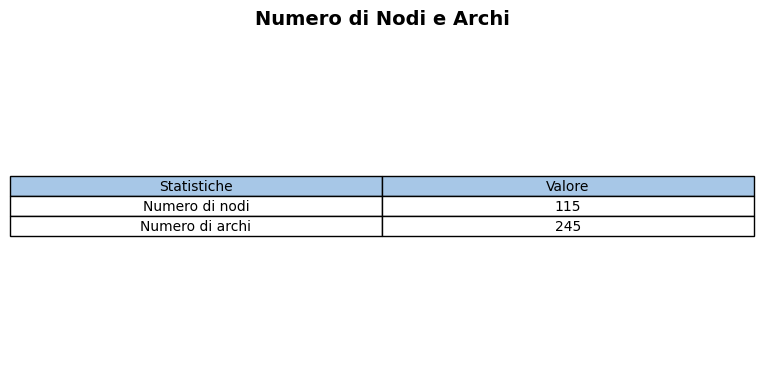

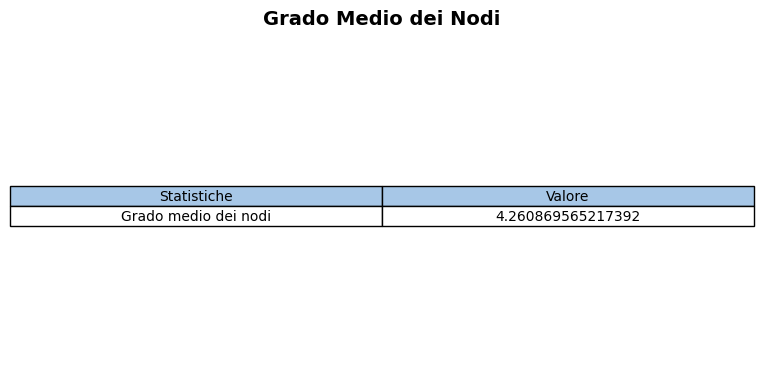

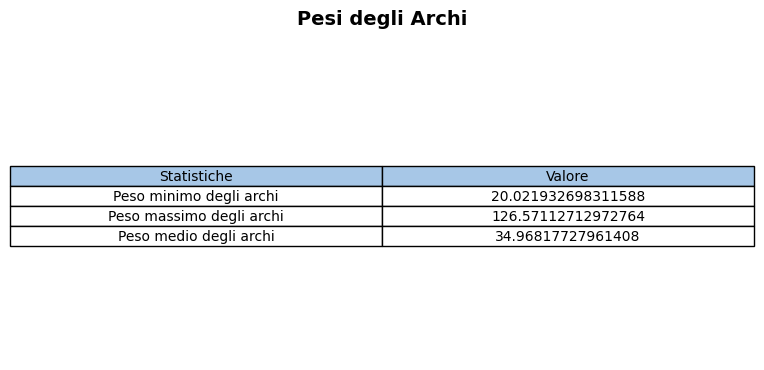

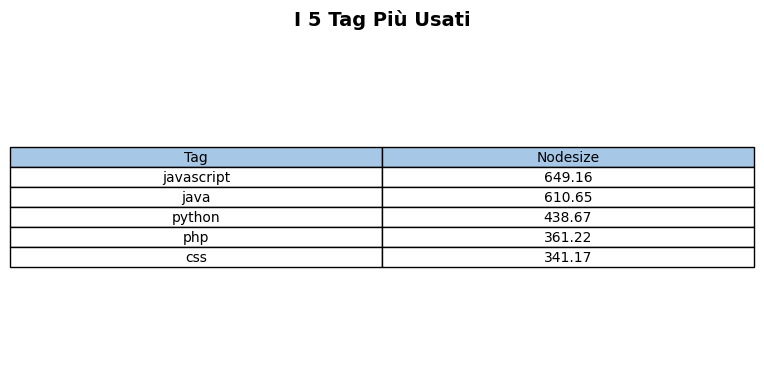

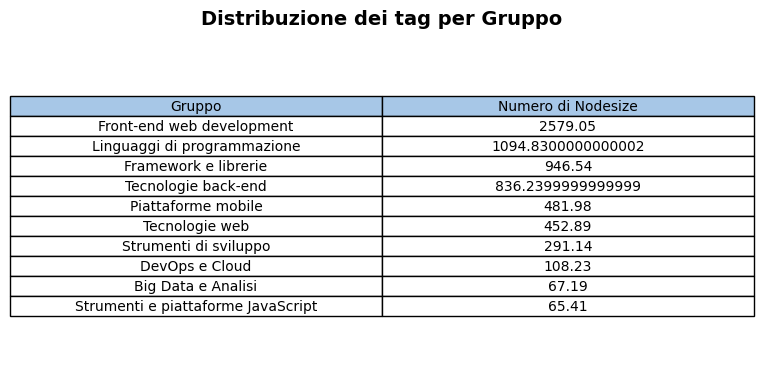

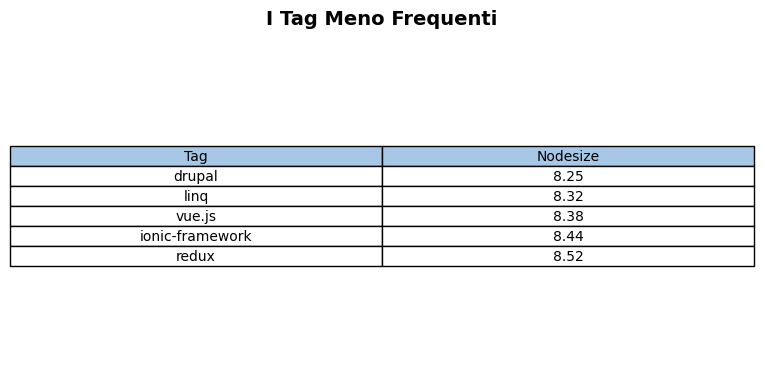

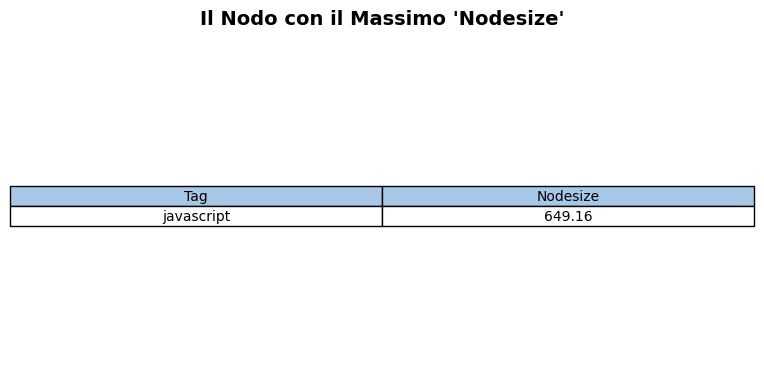

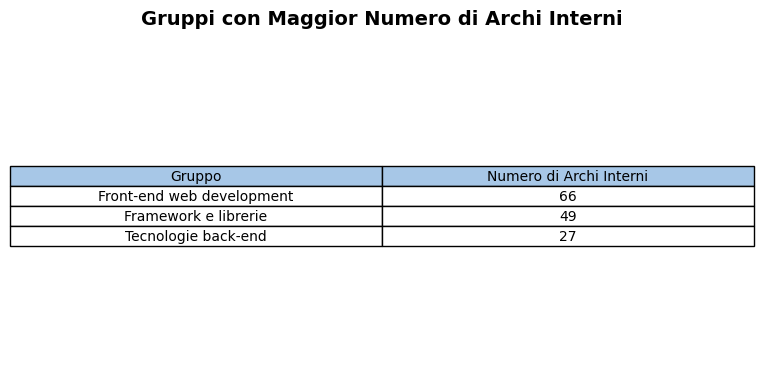

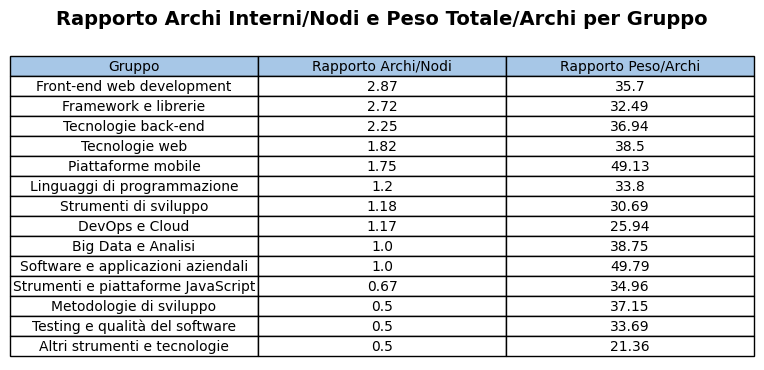

In [ ]:
def show_graph_summary(G, nodes_df):
    show_node_edge_count(G)
    show_avg_degree(G)
    show_edge_weights(G)
    show_top_5_tags(nodes_df)
    show_group_distribution(nodes_df)
    show_least_frequent_tags(nodes_df)
    show_max_nodesize_tag(nodes_df)
    show_internal_edges(G, nodes_df)
    show_group_edge_ratio(G, nodes_df)

show_graph_summary(G, nodes_df)

# Centralità

## Funzioni per il plot

In [ ]:
import seaborn as sns

# Funzione per creare il DistPlot della centralità
def plot_centrality_distribution(centrality_dict, centrality_name, xlabel):

    centrality_values = list(centrality_dict.values())

    # Crea il DistPlot
    plt.figure(figsize=(8, 6))
    sns.histplot(centrality_values, kde=True, bins=30, color="skyblue")
    plt.title(f"Distribuzione della {centrality_name}")
    plt.xlabel(xlabel)
    plt.ylabel("Frequenza")
    plt.show()

def plot_centrality_graph(centrality_dict, centrality_name, base_node_size=150, scaling_factor=1000):
    # Posizionamento dei nodi con Kamada-Kawai Layout
    pos = nx.kamada_kawai_layout(G)

    # Estrae i valori della centralità per la colorazione dei nodi
    centrality_values = list(centrality_dict.values())
    norm = Normalize(vmin=min(centrality_values), vmax=max(centrality_values))

    # Calcola la dimensione dei nodi basata sulla centralità
    node_sizes = [base_node_size + centrality * scaling_factor for centrality in centrality_values]

    # Calcola la centralità media
    avg_centrality = sum(centrality_values) / len(centrality_values)

    # Filtra i nodi che hanno una centralità maggiore della media
    labels = {node: node for node, centrality in centrality_dict.items() if centrality > avg_centrality}


    plt.figure(figsize=(12, 12))

    # Disegna i nodi con la colorazione basata sulla centralità
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,  # Grandezza dei nodi in base alla centralità
        node_color=centrality_values,  # Colore in base ai valori della centralità
        cmap=plt.cm.viridis,
        alpha=0.9
    )

    # Disegna gli archi
    nx.draw_networkx_edges(
        G, pos,
        width=1.5,
        alpha=0.6,
        edge_color='gray'
    )

    # Etichette dei nodi: mostra solo i nodi con centralità maggiore della media
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

    # Barra del colore che rappresenta la centralità
    sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array(centrality_values)  # Dati per la colorbar
    cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.8)
    cbar.set_label(f"{centrality_name} Value")


    plt.title(f"Rappresentazione della {centrality_name} con Kamada-Kawai Layout", fontsize=16)
    plt.axis('off')
    plt.show()
def print_top_10_central_nodes(centrality_dict, nodes_df, centrality_name):
    # Ordina i nodi per centralità in modo decrescente
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)

    # Seleziona i primi 10 nodi con la centralità maggiore
    top_10_nodes = sorted_nodes[:10]

    print(f"\nTop 10 nodi con la {centrality_name} più alta:")

    for i, (node, centrality_value) in enumerate(top_10_nodes, 1):
        # Trova il gruppo di ciascun nodo
        group = nodes_df[nodes_df['name'] == node]['group'].values[0]

        # Elenco dei gruppi associati al nodo
        groups = [f"{group}"]

        # Stampa
        print(f"{i}. Nodo: {node}, {centrality_name}: {centrality_value:.4f}, Gruppo: {', '.join(groups)}")




## Calcolo delle centralità e plotting

In [ ]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
def show_centralities():
  # DistPlot per ogni centralità
    plot_centrality_distribution(degree_centrality, "Degree Centrality", "Grado di Centralità")
    plot_centrality_distribution(closeness_centrality, "Closeness Centrality", "Closeness Centrality")
    plot_centrality_distribution(eigenvector_centrality, "Eigenvector Centrality", "Centralità Eigenvector")
    plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality", "Betweenness Centrality")

    # Rappresentazione grafica delle centralità
    plot_centrality_graph(degree_centrality, "Degree Centrality")
    print_top_10_central_nodes(degree_centrality, nodes_df, "Degree Centrality")
    plot_centrality_graph(closeness_centrality, "Closeness Centrality")
    print_top_10_central_nodes(closeness_centrality, nodes_df, "Closeness Centrality")
    plot_centrality_graph(eigenvector_centrality, "Eigenvector Centrality")
    print_top_10_central_nodes(eigenvector_centrality, nodes_df, "Eigenvector Centrality")
    plot_centrality_graph(betweenness_centrality, "Betweenness Centrality")
    print_top_10_central_nodes(betweenness_centrality, nodes_df, "Betweenness Centrality")


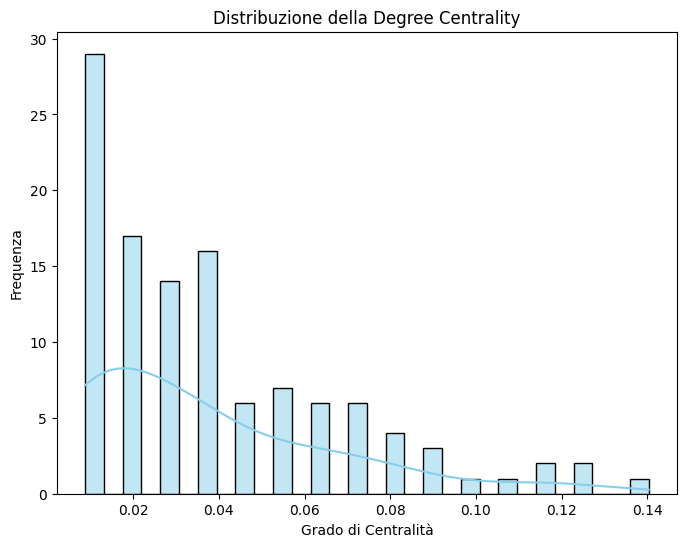

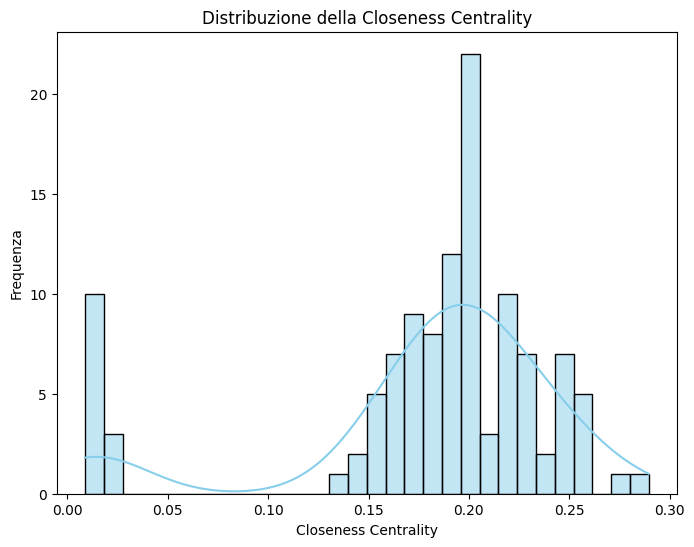

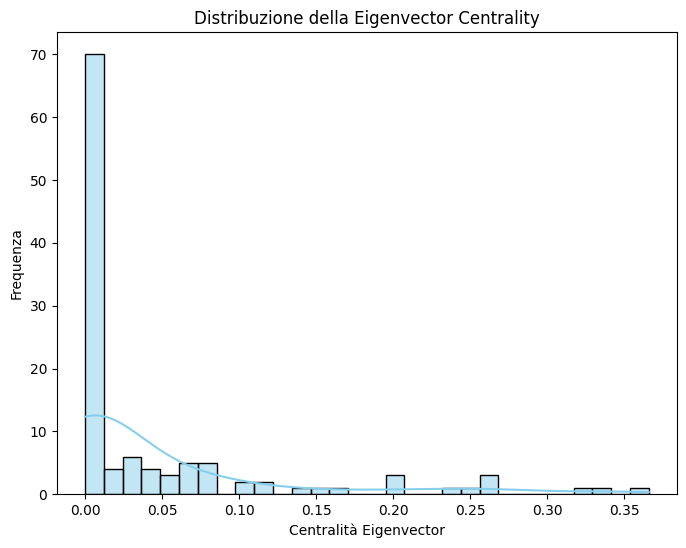

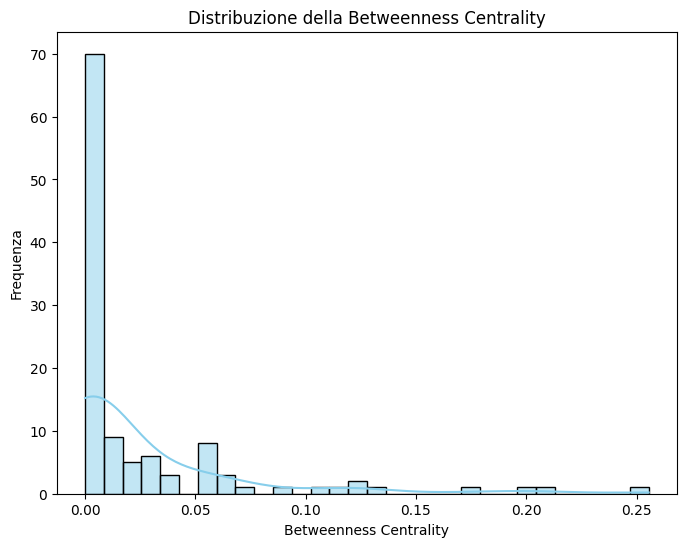

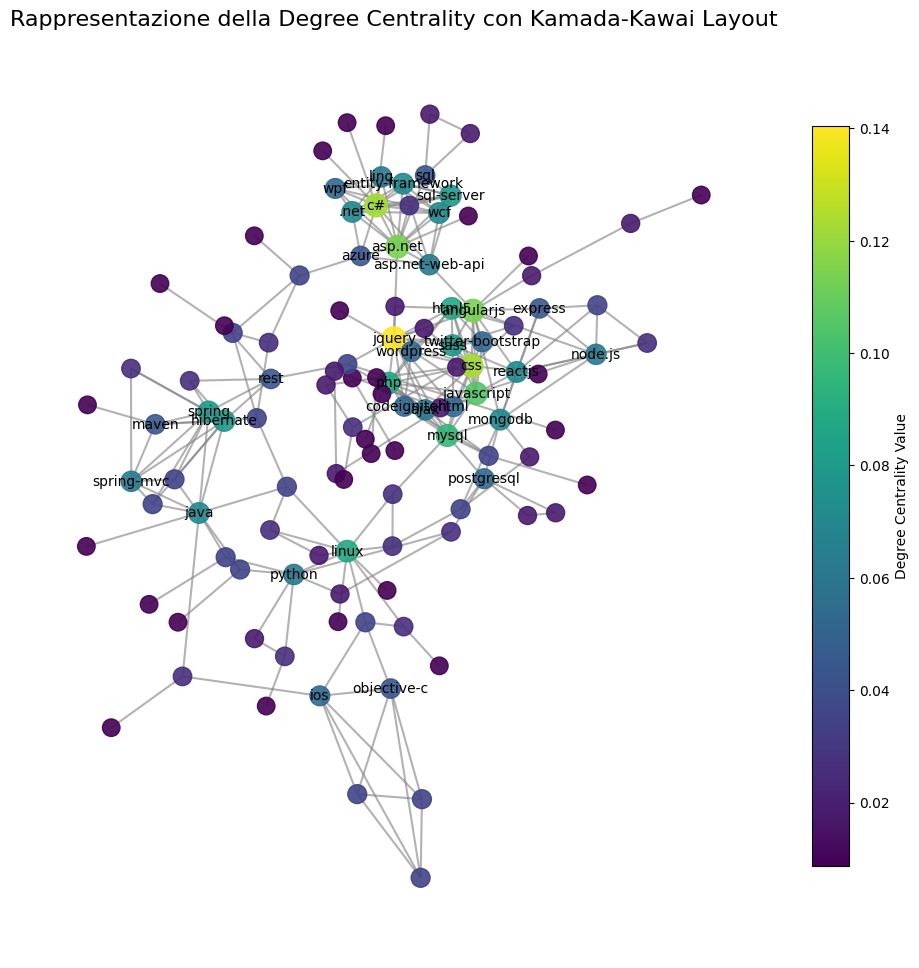


Top 10 nodi con la Degree Centrality più alta:
1. Nodo: jquery, Degree Centrality: 0.1404, Gruppo: Front-end web development
2. Nodo: c#, Degree Centrality: 0.1228, Gruppo: Framework e librerie
3. Nodo: css, Degree Centrality: 0.1228, Gruppo: Front-end web development
4. Nodo: asp.net, Degree Centrality: 0.1140, Gruppo: Framework e librerie
5. Nodo: angularjs, Degree Centrality: 0.1140, Gruppo: Front-end web development
6. Nodo: javascript, Degree Centrality: 0.1053, Gruppo: Front-end web development
7. Nodo: mysql, Degree Centrality: 0.0965, Gruppo: Front-end web development
8. Nodo: php, Degree Centrality: 0.0877, Gruppo: Front-end web development
9. Nodo: html5, Degree Centrality: 0.0877, Gruppo: Front-end web development
10. Nodo: linux, Degree Centrality: 0.0877, Gruppo: Strumenti di sviluppo


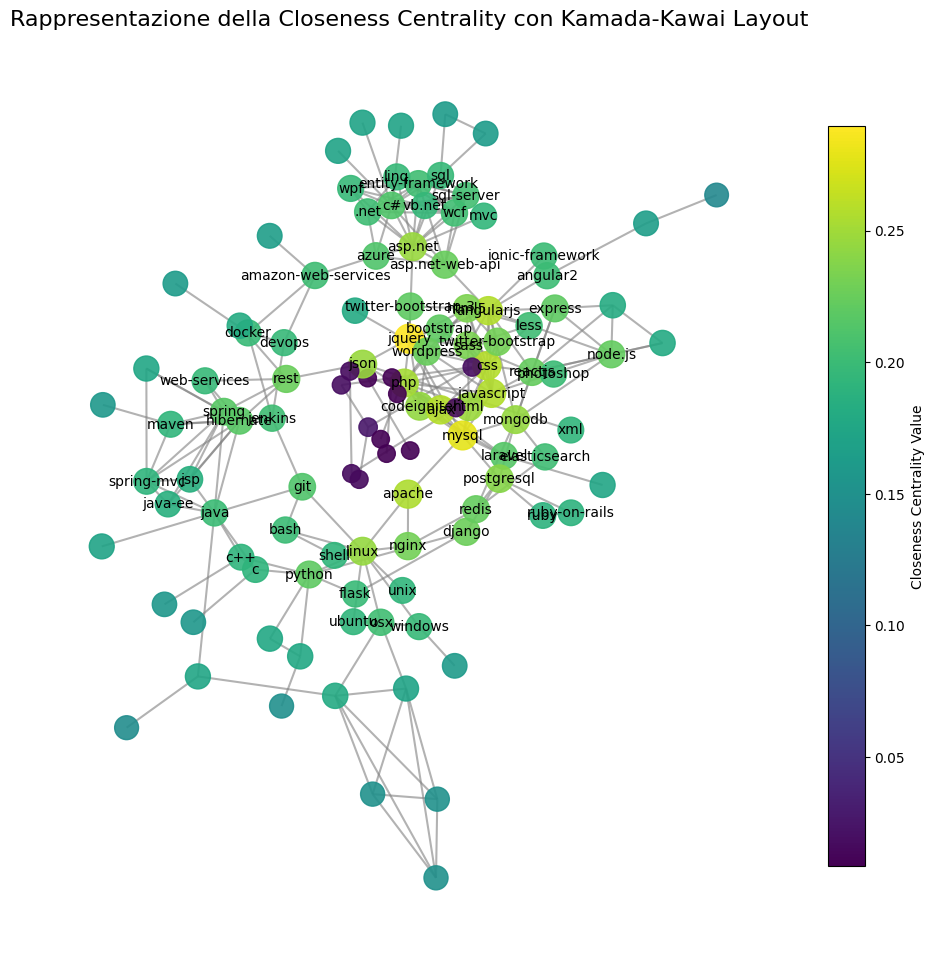


Top 10 nodi con la Closeness Centrality più alta:
1. Nodo: jquery, Closeness Centrality: 0.2896, Gruppo: Front-end web development
2. Nodo: mysql, Closeness Centrality: 0.2779, Gruppo: Front-end web development
3. Nodo: ajax, Closeness Centrality: 0.2586, Gruppo: Front-end web development
4. Nodo: css, Closeness Centrality: 0.2579, Gruppo: Front-end web development
5. Nodo: javascript, Closeness Centrality: 0.2571, Gruppo: Front-end web development
6. Nodo: angularjs, Closeness Centrality: 0.2571, Gruppo: Front-end web development
7. Nodo: apache, Closeness Centrality: 0.2549, Gruppo: Strumenti di sviluppo
8. Nodo: php, Closeness Centrality: 0.2514, Gruppo: Front-end web development
9. Nodo: html, Closeness Centrality: 0.2472, Gruppo: Front-end web development
10. Nodo: asp.net, Closeness Centrality: 0.2465, Gruppo: Framework e librerie


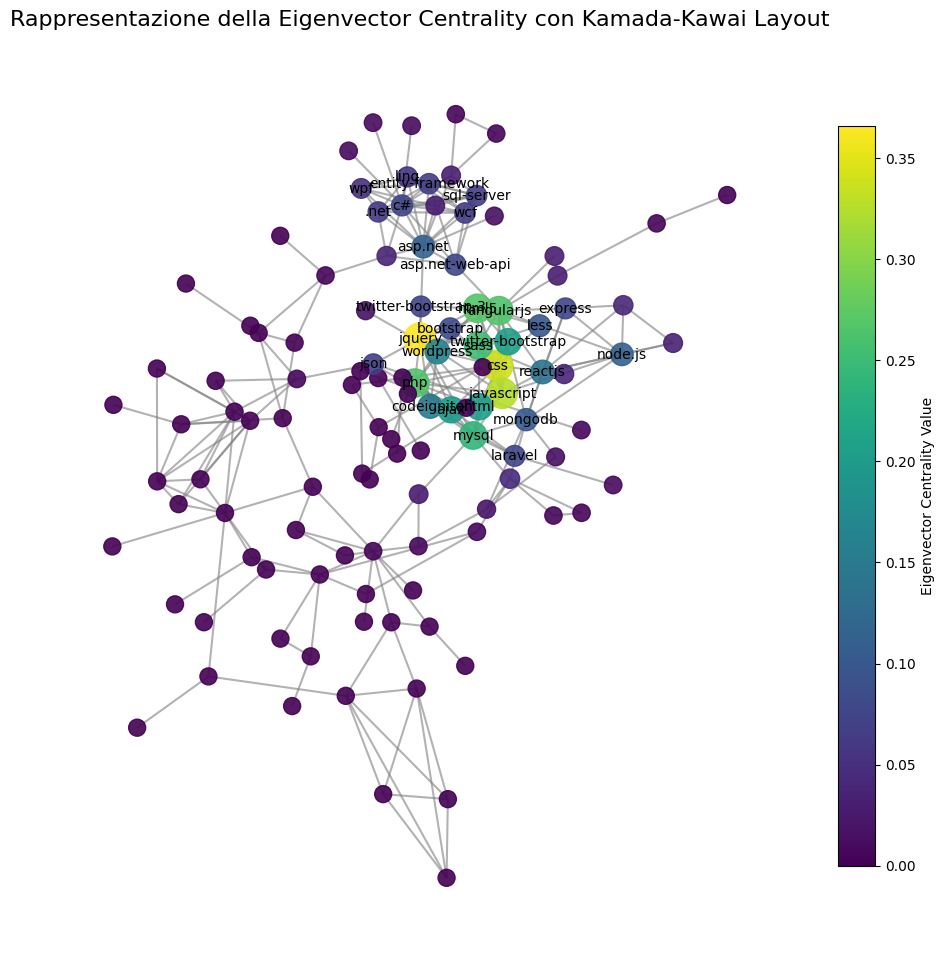


Top 10 nodi con la Eigenvector Centrality più alta:
1. Nodo: jquery, Eigenvector Centrality: 0.3658, Gruppo: Front-end web development
2. Nodo: css, Eigenvector Centrality: 0.3387, Gruppo: Front-end web development
3. Nodo: javascript, Eigenvector Centrality: 0.3256, Gruppo: Front-end web development
4. Nodo: html5, Eigenvector Centrality: 0.2681, Gruppo: Front-end web development
5. Nodo: php, Eigenvector Centrality: 0.2653, Gruppo: Front-end web development
6. Nodo: angularjs, Eigenvector Centrality: 0.2652, Gruppo: Front-end web development
7. Nodo: sass, Eigenvector Centrality: 0.2521, Gruppo: Front-end web development
8. Nodo: mysql, Eigenvector Centrality: 0.2393, Gruppo: Front-end web development
9. Nodo: twitter-bootstrap, Eigenvector Centrality: 0.2071, Gruppo: Front-end web development
10. Nodo: html, Eigenvector Centrality: 0.2038, Gruppo: Front-end web development


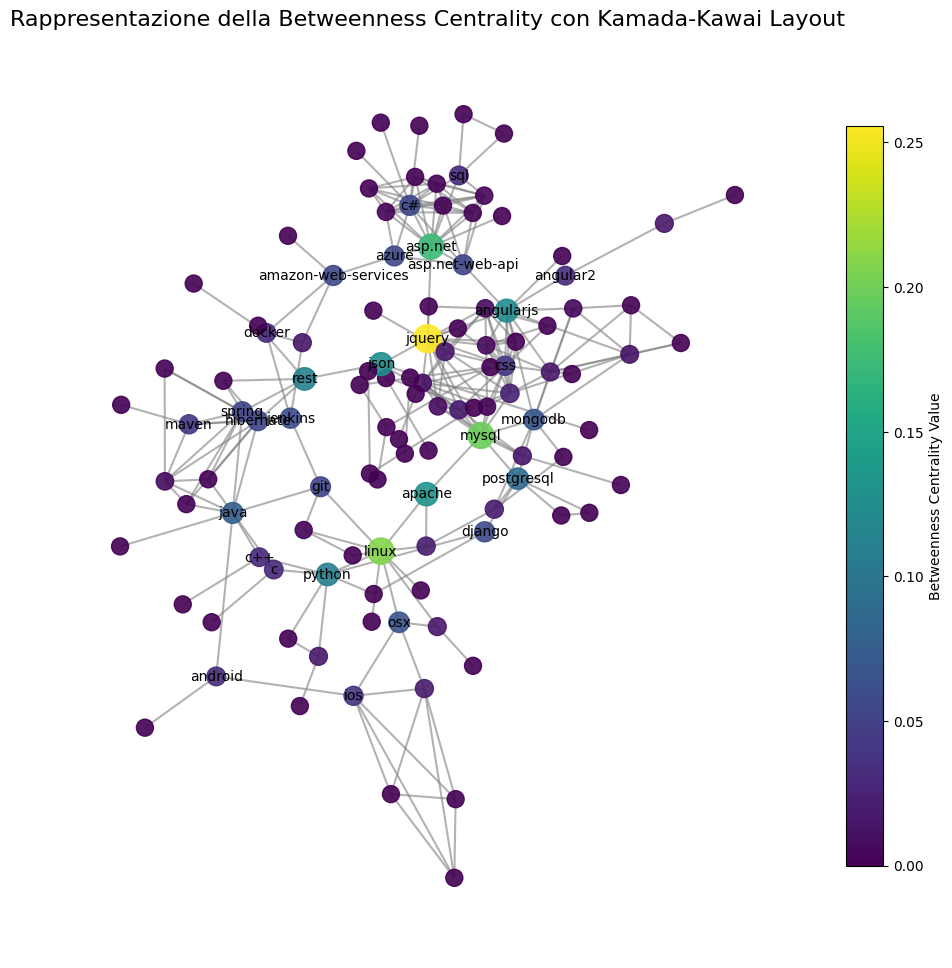


Top 10 nodi con la Betweenness Centrality più alta:
1. Nodo: jquery, Betweenness Centrality: 0.2555, Gruppo: Front-end web development
2. Nodo: linux, Betweenness Centrality: 0.2084, Gruppo: Strumenti di sviluppo
3. Nodo: mysql, Betweenness Centrality: 0.1977, Gruppo: Front-end web development
4. Nodo: asp.net, Betweenness Centrality: 0.1741, Gruppo: Framework e librerie
5. Nodo: apache, Betweenness Centrality: 0.1309, Gruppo: Strumenti di sviluppo
6. Nodo: json, Betweenness Centrality: 0.1232, Gruppo: Front-end web development
7. Nodo: angularjs, Betweenness Centrality: 0.1229, Gruppo: Front-end web development
8. Nodo: rest, Betweenness Centrality: 0.1137, Gruppo: Tecnologie back-end
9. Nodo: python, Betweenness Centrality: 0.1102, Gruppo: Linguaggi di programmazione
10. Nodo: postgresql, Betweenness Centrality: 0.0876, Gruppo: Tecnologie web


In [ ]:
show_centralities()

# Altre strutture e sottografi

In [ ]:
import random
import networkx as nx
import itertools

## Triadi

In [ ]:
def analyze_and_plot_triads(G, nodes_df):
    # Trova tutte le combinazioni di nodi per triadi (3 nodi)
    nodes = list(G.nodes)
    triads = [list(triad) for triad in itertools.combinations(nodes, 3)]
    print(f"Numero totale di triadi: {len(triads)}")

    # Conta le triadi chiuse e aperte
    closed_triads = [triad for triad in triads if G.subgraph(triad).number_of_edges() == 3]
    open_triads = [triad for triad in triads if G.subgraph(triad).number_of_edges() == 2]

    print(f"Numero di triadi chiuse (triangoli): {len(closed_triads)}")
    print(f"Numero di triadi aperte: {len(open_triads)}")

    # Seleziona 3 triadi chiuse casuali
    if len(closed_triads) > 3:
        selected_triads = random.sample(closed_triads, 3)
    else:
        selected_triads = closed_triads

    print("\nTriadi chiuse casuali nel grafo:")
    for i, triad in enumerate(selected_triads, 1):
        print(f"Triade {i}: {triad}")

        # Crea un sottografo per la triade
        subgraph = G.subgraph(triad)

        # Visualizza la triade con layout Kamada-Kawai
        pos = nx.kamada_kawai_layout(subgraph)
        plt.figure(figsize=(8, 8))
        nx.draw(
            subgraph, pos,
            with_labels=True,
            node_color="skyblue",
            node_size=500,
            edge_color="gray",
            width=2,
            font_size=12
        )
        plt.title(f"Triade Chiusa {i}")
        plt.show()

    # Calcola le top 5 triadi chiuse per nodesize
    triads_with_nodesize = []
    for triad in closed_triads:
        nodesize_sum = sum(nodes_df.loc[nodes_df["name"] == node, "nodesize"].iloc[0] for node in triad)
        triads_with_nodesize.append((triad, nodesize_sum))

    top_nodesize_triads = sorted(triads_with_nodesize, key=lambda x: x[1], reverse=True)[:5]
    print("\nTop 5 triadi chiuse per somma del nodesize:")
    for i, (triad, nodesize_sum) in enumerate(top_nodesize_triads, 1):
        print(f"Triade {i}: {triad}, Somma nodesize: {nodesize_sum:.2f}")

    # Calcola le top 5 triadi chiuse per peso degli archi
    triads_with_weights = []
    for triad in closed_triads:
        weight_sum = sum(G[u][v]["weight"] for u, v in itertools.combinations(triad, 2) if G.has_edge(u, v))
        triads_with_weights.append((triad, weight_sum))

    top_weight_triads = sorted(triads_with_weights, key=lambda x: x[1], reverse=True)[:5]
    print("\nTop 5 triadi chiuse per somma del peso degli archi (value):")
    for i, (triad, weight_sum) in enumerate(top_weight_triads, 1):
        print(f"Triade {i}: {triad}, Somma peso archi: {weight_sum:.2f}")


Numero totale di triadi: 246905
Numero di triadi chiuse (triangoli): 239
Numero di triadi aperte: 755

Triadi chiuse casuali nel grafo:
Triade 1: ['asp.net', 'entity-framework', 'wcf']


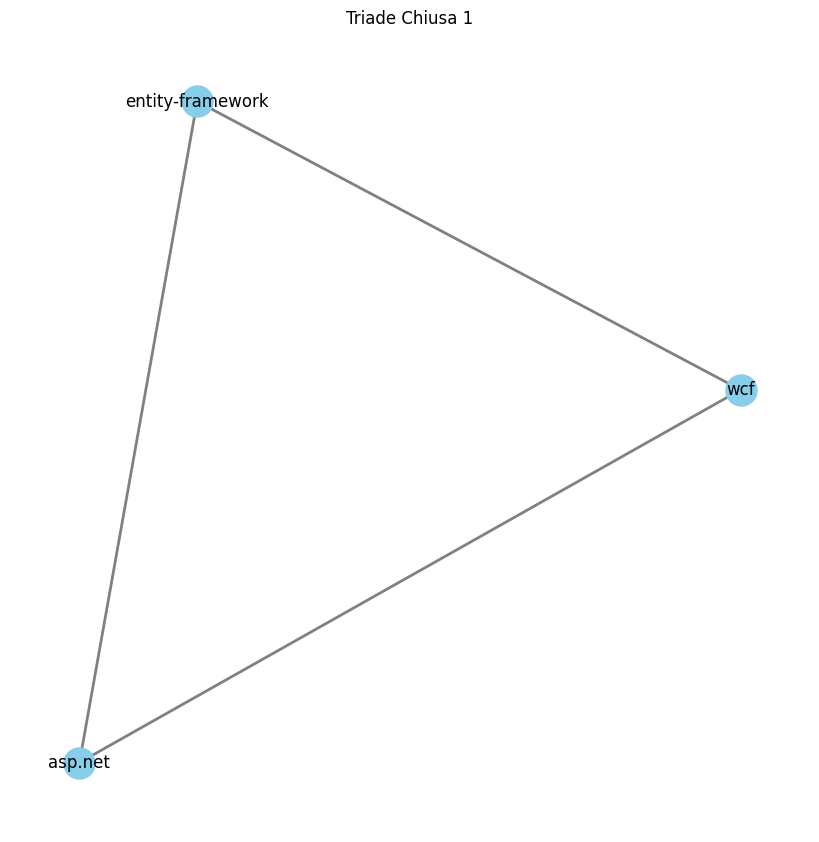

Triade 2: ['sql-server', 'asp.net', 'linq']


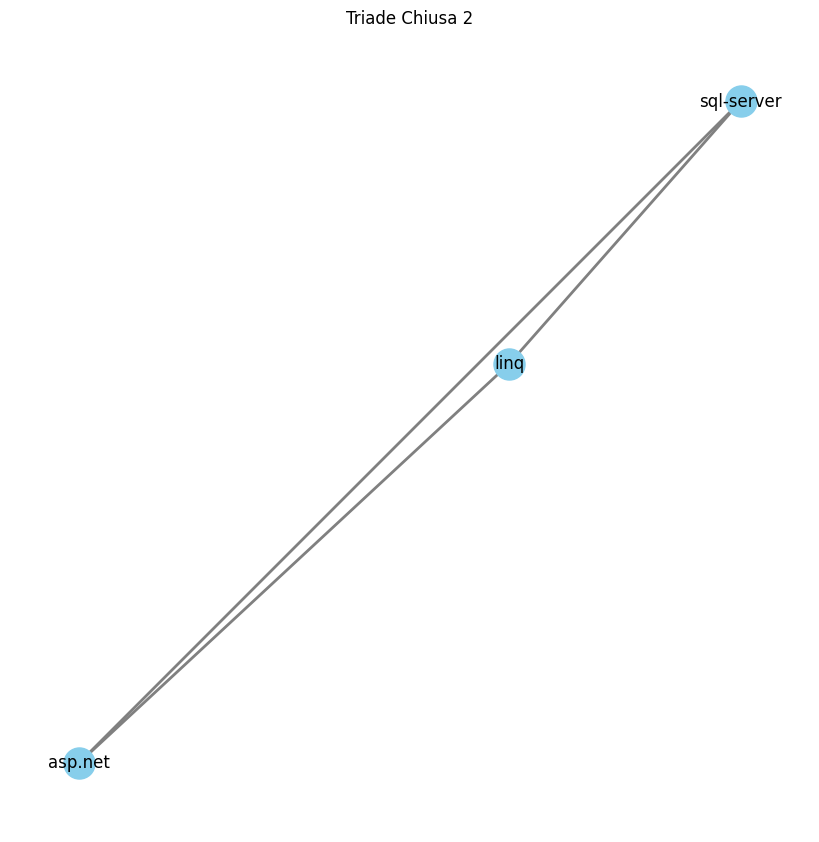

Triade 3: ['javascript', 'angularjs', 'sass']


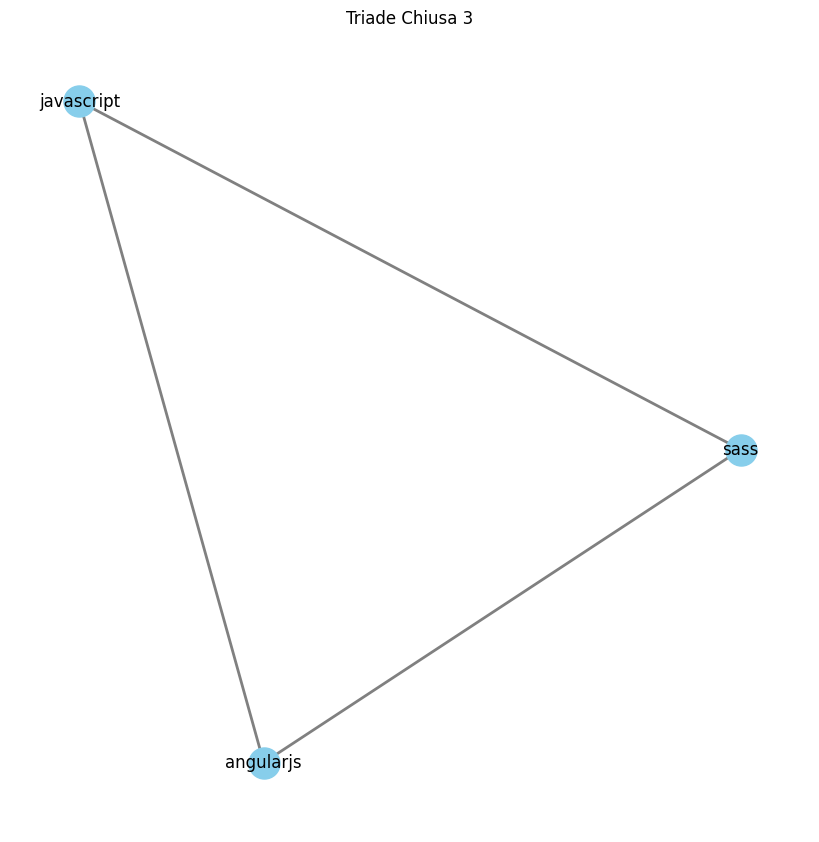


Top 5 triadi chiuse per somma del nodesize:
Triade 1: ['css', 'php', 'javascript'], Somma nodesize: 1351.55
Triade 2: ['php', 'javascript', 'html'], Somma nodesize: 1282.83
Triade 3: ['css', 'javascript', 'html'], Somma nodesize: 1262.78
Triade 4: ['jquery', 'php', 'javascript'], Somma nodesize: 1218.67
Triade 5: ['jquery', 'css', 'javascript'], Somma nodesize: 1198.62

Top 5 triadi chiuse per somma del peso degli archi (value):
Triade 1: ['css', 'javascript', 'html'], Somma peso archi: 261.86
Triade 2: ['ios', 'swift', 'objective-c'], Somma peso archi: 245.07
Triade 3: ['jquery', 'css', 'html'], Somma peso archi: 237.48
Triade 4: ['hibernate', 'spring-mvc', 'spring'], Somma peso archi: 230.71
Triade 5: ['css', 'php', 'html'], Somma peso archi: 223.68


In [ ]:
analyze_and_plot_triads(G, nodes_df)

## Cliques

In [ ]:
def analyze_and_plot_cliques(G, nodes_df):
    # Trova tutte le clique
    cliques = list(nx.find_cliques(G))
    print(f"Numero totale di clique trovate: {len(cliques)}")

    # Conta le clique per dimensione
    clique_sizes = {}
    for clique in cliques:
        size = len(clique)
        clique_sizes[size] = clique_sizes.get(size, 0) + 1

    # Stampa il conteggio delle clique per dimensione
    print("\nDistribuzione delle clique per dimensione:")
    for size, count in sorted(clique_sizes.items(), reverse=True):
        print(f"Clique di dimensione {size}: {count}")

    # Trova la dimensione massima delle clique
    max_size = max(clique_sizes.keys())
    largest_cliques = [clique for clique in cliques if len(clique) == max_size]

    print(f"\nClique con il maggior numero di nodi ({max_size} nodi):")
    for i, clique in enumerate(largest_cliques, 1):
        print(f"Clique {i}: {clique}")

        # Calcola la distribuzione dei gruppi
        group_counts = {}
        for node in clique:
            group = G.nodes[node].get('group', 'Unknown')
            group_counts[group] = group_counts.get(group, 0) + 1

        # Stampa la distribuzione dei gruppi
        group_info = ", ".join([f"{count} nodi appartenenti al gruppo {group}" for group, count in group_counts.items()])
        print(f"Distribuzione dei gruppi: {group_info}")

        # Calcola la somma del nodesize dei nodi della clique
        nodesize_sum = sum(nodes_df.loc[nodes_df['name'] == node, 'nodesize'].iloc[0] for node in clique)
        print(f"Somma del nodesize dei nodi: {nodesize_sum:.2f}")

        # Calcola la somma del peso degli archi nella clique
        weight_sum = sum(
            G[u][v].get('weight', 0)
            for u, v in itertools.combinations(clique, 2)
            if G.has_edge(u, v)
        )
        print(f"Somma del peso degli archi (value): {weight_sum:.2f}")

    # Visualizza graficamente tutte le clique più grandi
    for i, clique in enumerate(largest_cliques, 1):
        subgraph = G.subgraph(clique)
        pos = nx.kamada_kawai_layout(subgraph)
        plt.figure(figsize=(10, 10))
        nx.draw(
            subgraph, pos,
            with_labels=True,
            node_color="lightgreen",
            node_size=700,
            edge_color="gray",
            width=2,
            font_size=12
        )
        plt.title(f"Clique più grande {i} ({max_size} nodi)")
        plt.show()


Numero totale di clique trovate: 89

Distribuzione delle clique per dimensione:
Clique di dimensione 7: 3
Clique di dimensione 6: 3
Clique di dimensione 5: 8
Clique di dimensione 4: 14
Clique di dimensione 3: 21
Clique di dimensione 2: 40

Clique con il maggior numero di nodi (7 nodi):
Clique 1: ['jquery', 'css', 'javascript', 'html5', 'sass', 'twitter-bootstrap', 'angularjs']
Distribuzione dei gruppi: 7 nodi appartenenti al gruppo Front-end web development
Somma del nodesize dei nodi: 1526.99
Somma del peso degli archi (value): 797.80
Clique 2: ['wpf', 'wcf', 'asp.net', 'linq', 'c#', 'entity-framework', '.net']
Distribuzione dei gruppi: 7 nodi appartenenti al gruppo Framework e librerie
Somma del nodesize dei nodi: 579.07
Somma del peso degli archi (value): 794.62
Clique 3: ['sql-server', 'wcf', 'asp.net', 'c#', 'entity-framework', 'linq', '.net']
Distribuzione dei gruppi: 7 nodi appartenenti al gruppo Framework e librerie
Somma del nodesize dei nodi: 624.31
Somma del peso degli archi

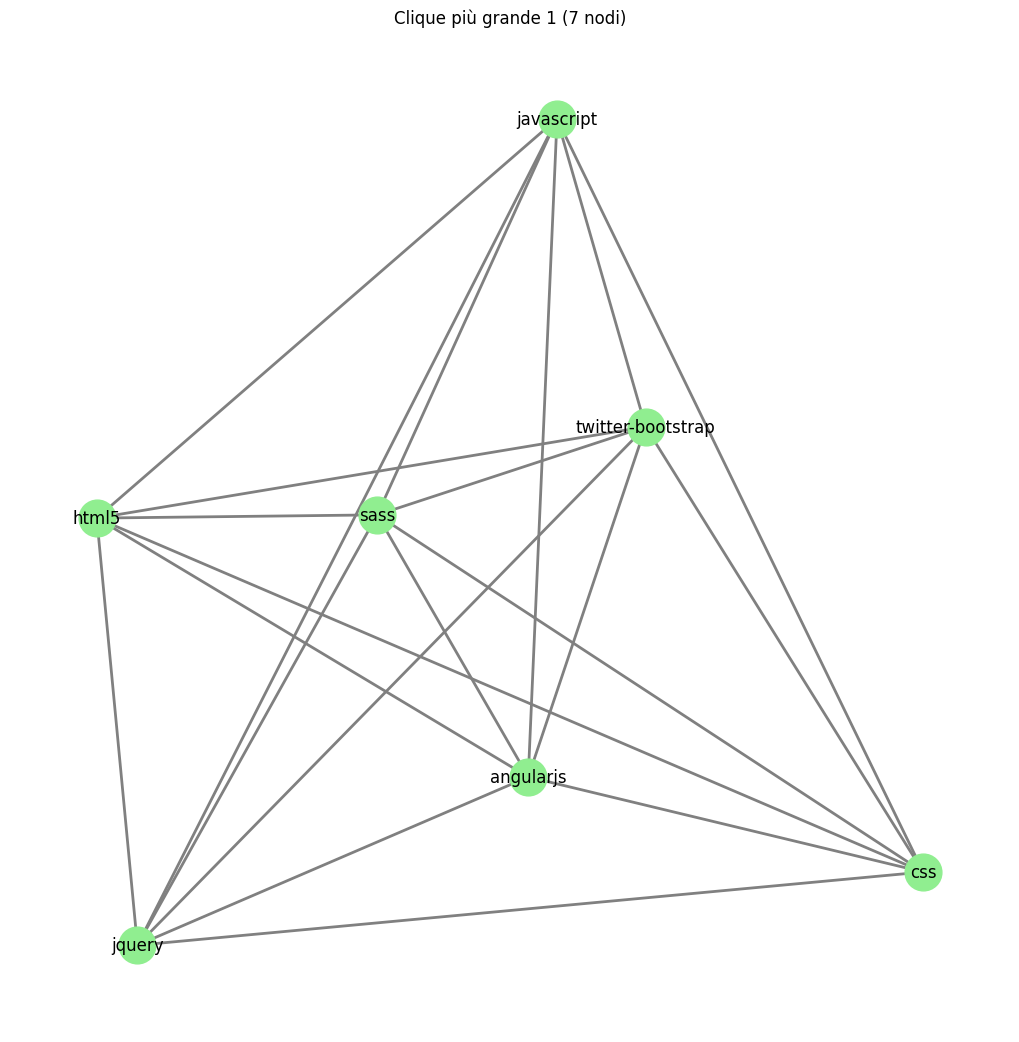

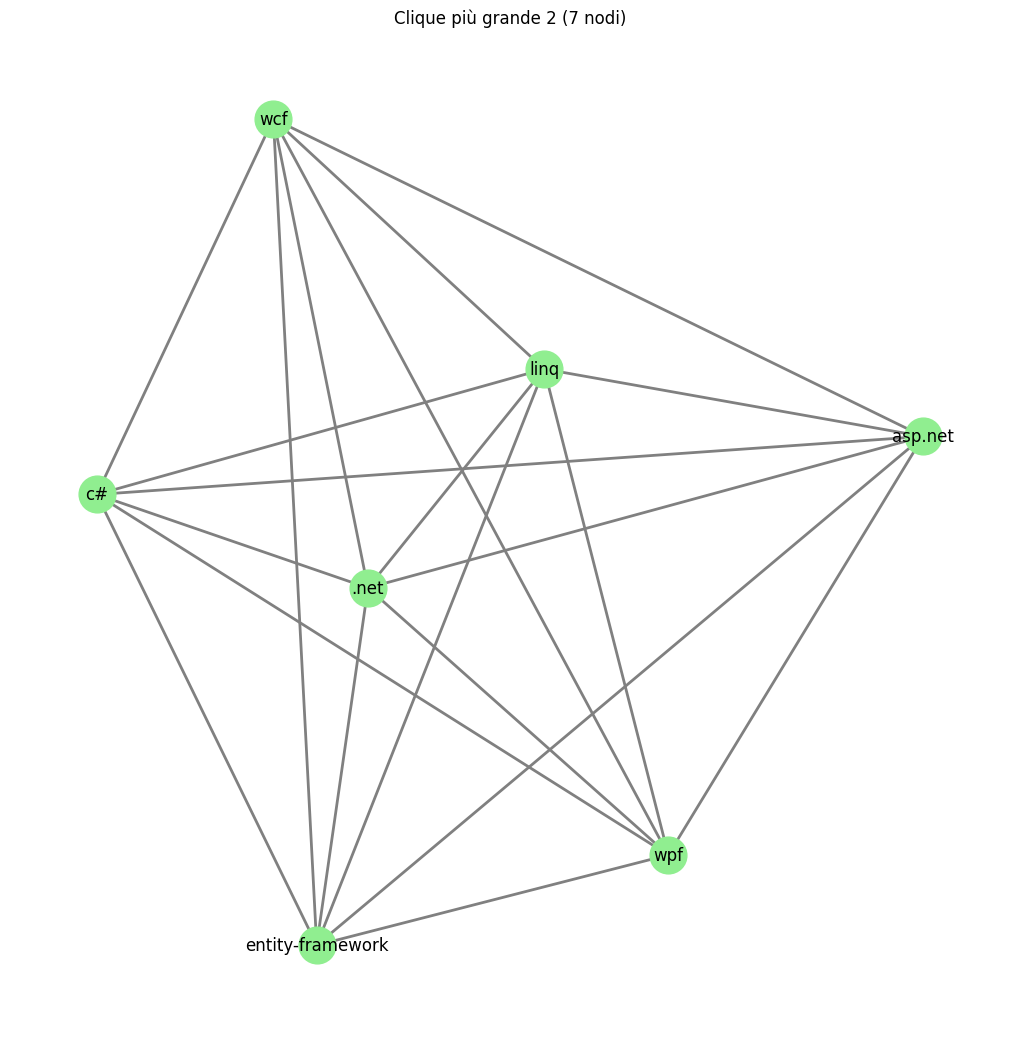

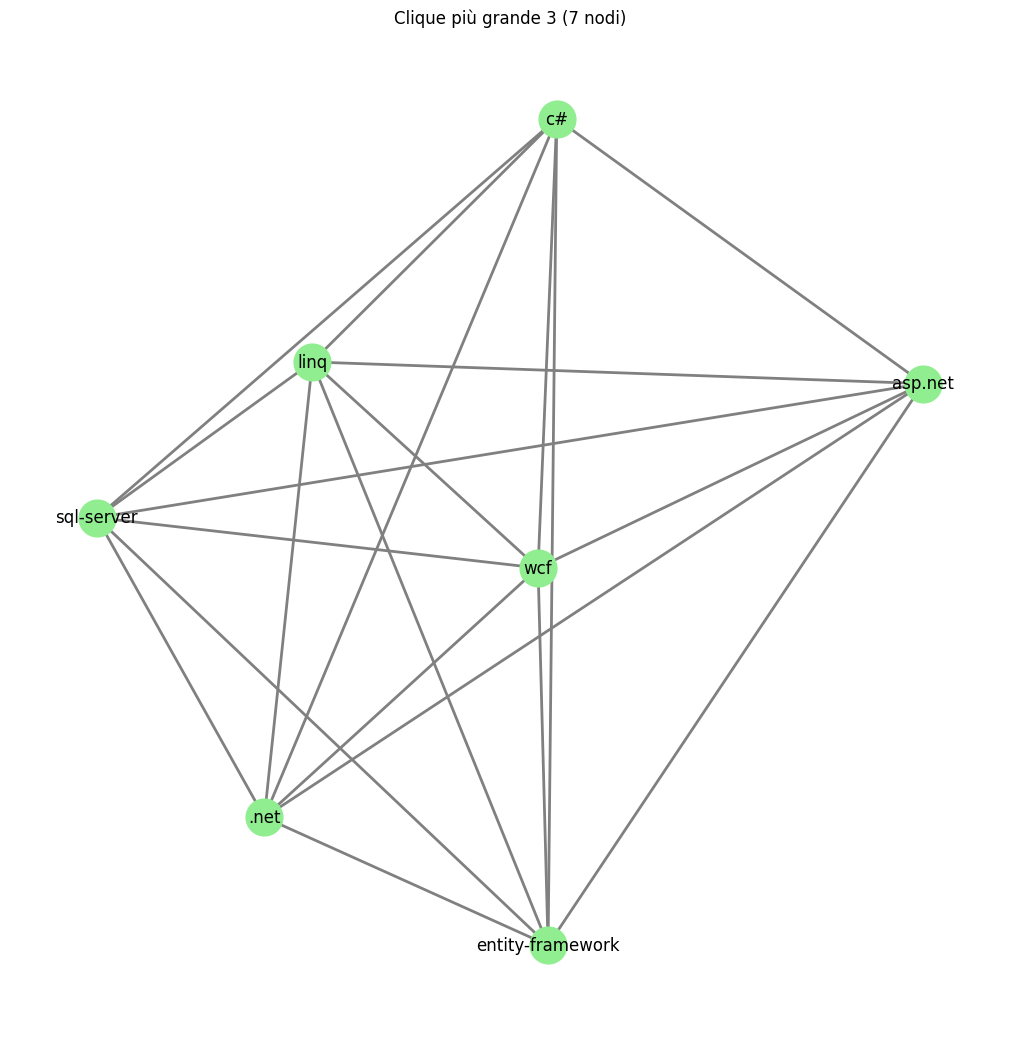

In [ ]:
analyze_and_plot_cliques(G, nodes_df)

## K-core

In [ ]:
def analyze_kcore(G, k):
    # Trova il k-core per un dato valore di k
    k_core = nx.k_core(G, k)
    print(f"K-core con k = {k} ha {len(k_core.nodes)} nodi e {len(k_core.edges)} archi.")

    # Calcola la distribuzione dei nodi per gruppo
    group_counts = {}
    for node in k_core.nodes:
        group = G.nodes[node].get('group', 'Unknown')
        group_counts[group] = group_counts.get(group, 0) + 1

    if len(k_core.nodes) > 0:

      # Calcola il numero totale di nodi per gruppo nell'intero grafo
      group_counts_total = {}
      for node in G.nodes:
        group = G.nodes[node].get('group', 'Unknown')
        group_counts_total[group] = group_counts_total.get(group, 0) + 1

      # Stampa la distribuzione dei nodi per gruppo
      print("\nDistribuzione dei nodi per gruppo nel k-core:")
      for group, count in group_counts.items():
          total = group_counts_total.get(group, 0)
          print(f"Gruppo {group}: {count} nodi su {total} totali del gruppo")
      print("\n")

      # Visualizza il grafo solo se ci sono nodi
      if k > 4:
          plt.figure(figsize=(8, 8))
          nx.draw(
              k_core, with_labels=True,
              node_size=500, node_color='lightblue',
              font_size=10, edge_color='gray'
          )
          plt.title(f"K-core con k = {k}")
          plt.show()



K-core con k = 3 ha 62 nodi e 182 archi.

Distribuzione dei nodi per gruppo nel k-core:
Gruppo Framework e librerie: 12 nodi su 18 totali del gruppo
Gruppo Front-end web development: 16 nodi su 23 totali del gruppo
Gruppo DevOps e Cloud: 4 nodi su 6 totali del gruppo
Gruppo Piattaforme mobile: 6 nodi su 8 totali del gruppo
Gruppo Tecnologie back-end: 10 nodi su 12 totali del gruppo
Gruppo Tecnologie web: 8 nodi su 11 totali del gruppo
Gruppo Strumenti di sviluppo: 3 nodi su 11 totali del gruppo
Gruppo Linguaggi di programmazione: 3 nodi su 10 totali del gruppo


K-core con k = 4 ha 38 nodi e 125 archi.

Distribuzione dei nodi per gruppo nel k-core:
Gruppo Front-end web development: 13 nodi su 23 totali del gruppo
Gruppo Tecnologie back-end: 6 nodi su 12 totali del gruppo
Gruppo Piattaforme mobile: 5 nodi su 8 totali del gruppo
Gruppo Framework e librerie: 10 nodi su 18 totali del gruppo
Gruppo Tecnologie web: 4 nodi su 11 totali del gruppo


K-core con k = 5 ha 22 nodi e 83 archi.

Dis

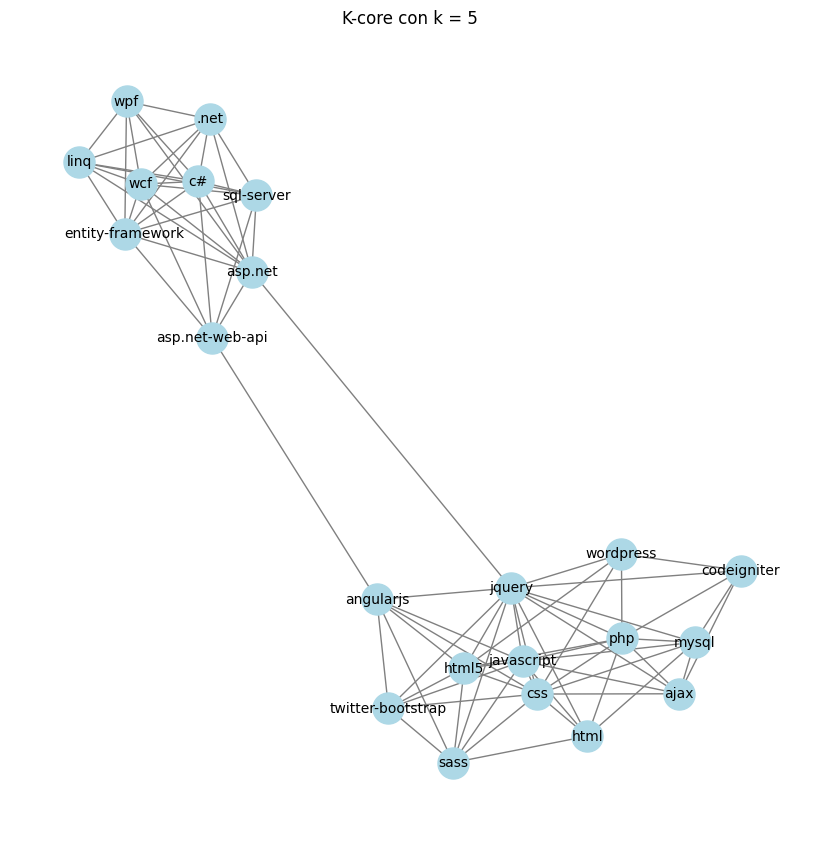

K-core con k = 6 ha 16 nodi e 55 archi.

Distribuzione dei nodi per gruppo nel k-core:
Gruppo Framework e librerie: 9 nodi su 18 totali del gruppo
Gruppo Front-end web development: 7 nodi su 23 totali del gruppo




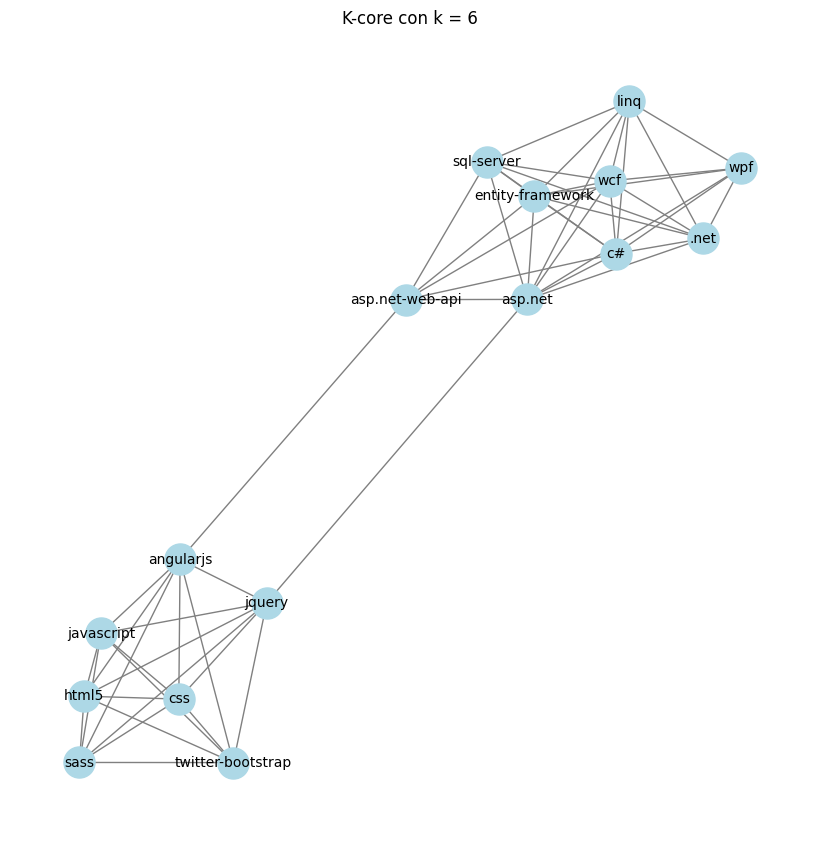

K-core con k = 7 ha 0 nodi e 0 archi.


In [ ]:
analyze_kcore(G, 3)
analyze_kcore(G, 4)
analyze_kcore(G, 5)
analyze_kcore(G, 6)
analyze_kcore(G, 7)

## Ego network

In [ ]:
def analyze_and_plot_ego_network(G, nodes_df, node, layout_type="custom"):

    if node not in G:
        print(f"Il nodo {node} non è presente nel grafo.")
        return

    # Crea l'ego network per il nodo dato
    ego_net = nx.ego_graph(G, node)

    # Informazioni sulla ego network
    num_nodes = ego_net.number_of_nodes()
    num_edges = ego_net.number_of_edges()
    print(f"Ego network del nodo {node}:")
    print(f"- Numero di nodi: {num_nodes}")
    print(f"- Numero di archi: {num_edges}")

    # Conta i nodi per gruppo
    group_counts = {}
    for n in ego_net.nodes:
        group = G.nodes[n].get('group', 'Unknown')
        group_counts[group] = group_counts.get(group, 0) + 1

    # Stampa la distribuzione per gruppo
    print("Distribuzione dei nodi per gruppo nella ego network:")
    for group, count in group_counts.items():
        print(f"Gruppo {group}: {count} nodi")

    # Calcola la somma del `nodesize` dei nodi nella ego network
    nodesize_sum = sum(
        nodes_df.loc[nodes_df['name'] == n, 'nodesize'].iloc[0]
        for n in ego_net.nodes if n in nodes_df['name'].values
    )
    print(f"Somma del nodesize dei nodi nella ego network: {nodesize_sum:.2f}")

    # Calcola la somma del peso degli archi nella ego network
    weight_sum = sum(
        d.get('weight', 0)
        for _, _, d in ego_net.edges(data=True)
    )
    print(f"Somma del peso degli archi (value) nella ego network: {weight_sum:.2f}")

    # Seleziona il layout
    if layout_type == "custom":
        # Layout personalizzato: nodo "ego" al centro
        pos = {node: (0, 0)}  # Nodo ego al centro
        neighbors = list(ego_net.neighbors(node))
        angle_step = 2 * np.pi / len(neighbors) if neighbors else 0

        for i, neighbor in enumerate(neighbors):
            angle = i * angle_step
            pos[neighbor] = (np.cos(angle), np.sin(angle))
    elif layout_type == "spring":
        # Usa il layout Spring
        pos = nx.spring_layout(ego_net)
    elif layout_type == 'kamada':
        # Usa il layout Kamada
        pos = nx.kamada_kawai_layout(ego_net)
    else:
        print(f"Tipo di layout '{layout_type}' non riconosciuto. Usa 'custom', 'spring' o 'kamada'.")
        return


    plt.figure(figsize=(8, 8))
    nx.draw(
        ego_net, pos,
        with_labels=True,
        node_size=700,
        node_color=["red" if n == node else "skyblue" for n in ego_net.nodes],
        edge_color="gray",
        font_size=10
    )
    plt.title(f"Ego Network del Nodo {node} (Layout: {layout_type.capitalize()})")
    plt.show()


Ego network del nodo jquery:
- Numero di nodi: 17
- Numero di archi: 56
Distribuzione dei nodi per gruppo nella ego network:
Gruppo Front-end web development: 16 nodi
Gruppo Framework e librerie: 1 nodi
Somma del nodesize dei nodi nella ego network: 2605.29
Somma del peso degli archi (value) nella ego network: 2033.03


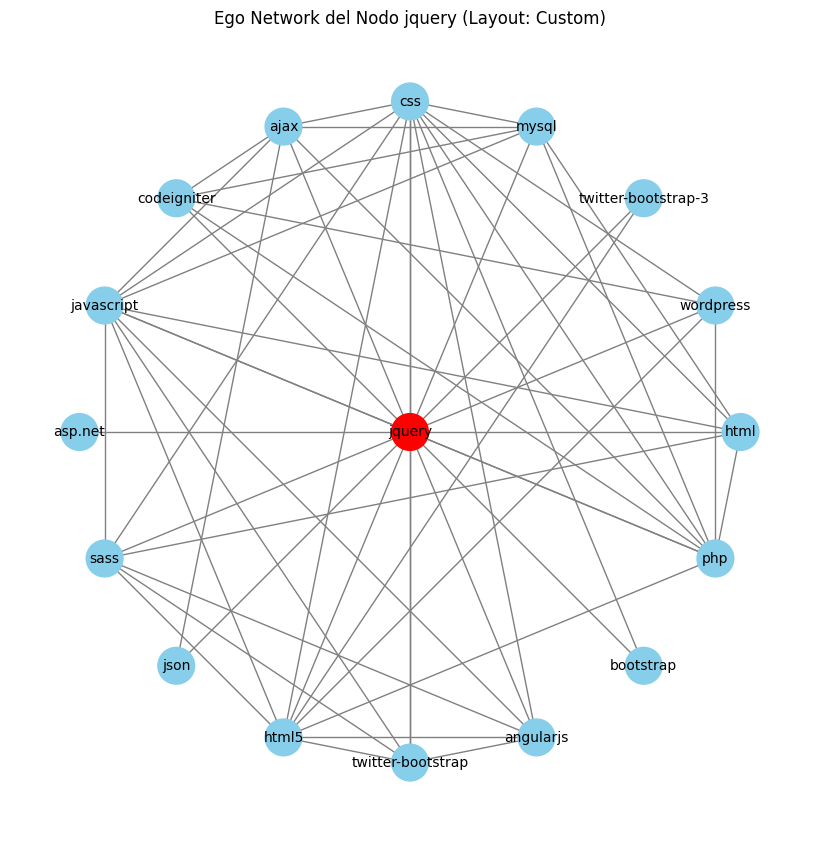

Ego network del nodo jquery:
- Numero di nodi: 17
- Numero di archi: 56
Distribuzione dei nodi per gruppo nella ego network:
Gruppo Front-end web development: 16 nodi
Gruppo Framework e librerie: 1 nodi
Somma del nodesize dei nodi nella ego network: 2605.29
Somma del peso degli archi (value) nella ego network: 2033.03


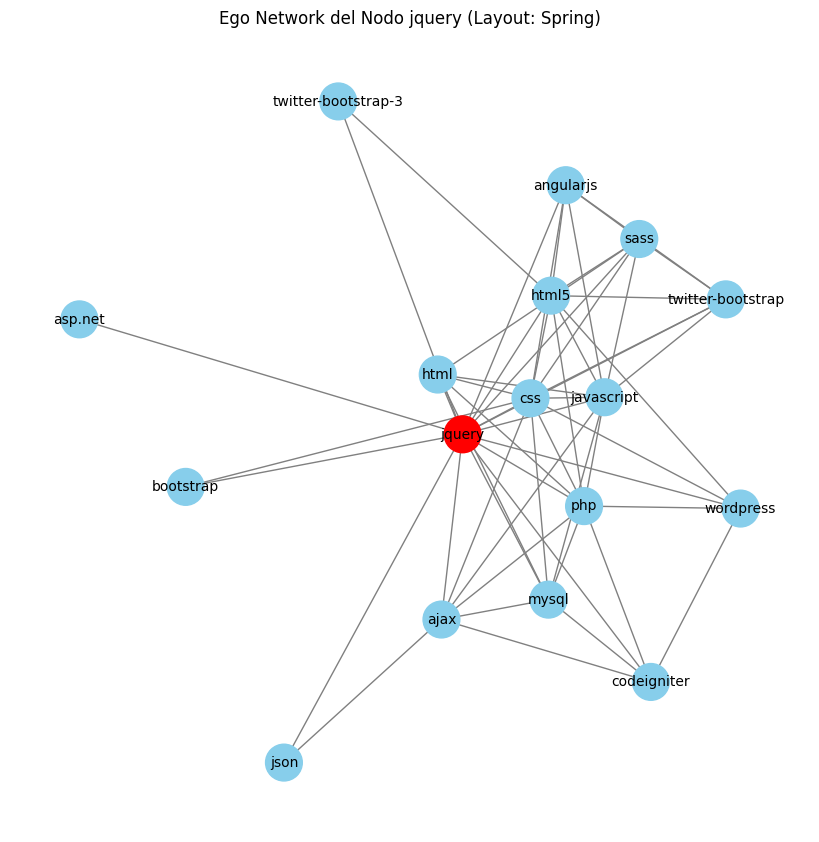

In [ ]:
analyze_and_plot_ego_network(G, nodes_df, 'jquery')
analyze_and_plot_ego_network(G, nodes_df, 'jquery', 'spring')

Ego network del nodo asp.net:
- Numero di nodi: 14
- Numero di archi: 44
Distribuzione dei nodi per gruppo nella ego network:
Gruppo Framework e librerie: 13 nodi
Gruppo Front-end web development: 1 nodi
Somma del nodesize dei nodi nella ego network: 1065.65
Somma del peso degli archi (value) nella ego network: 1453.55


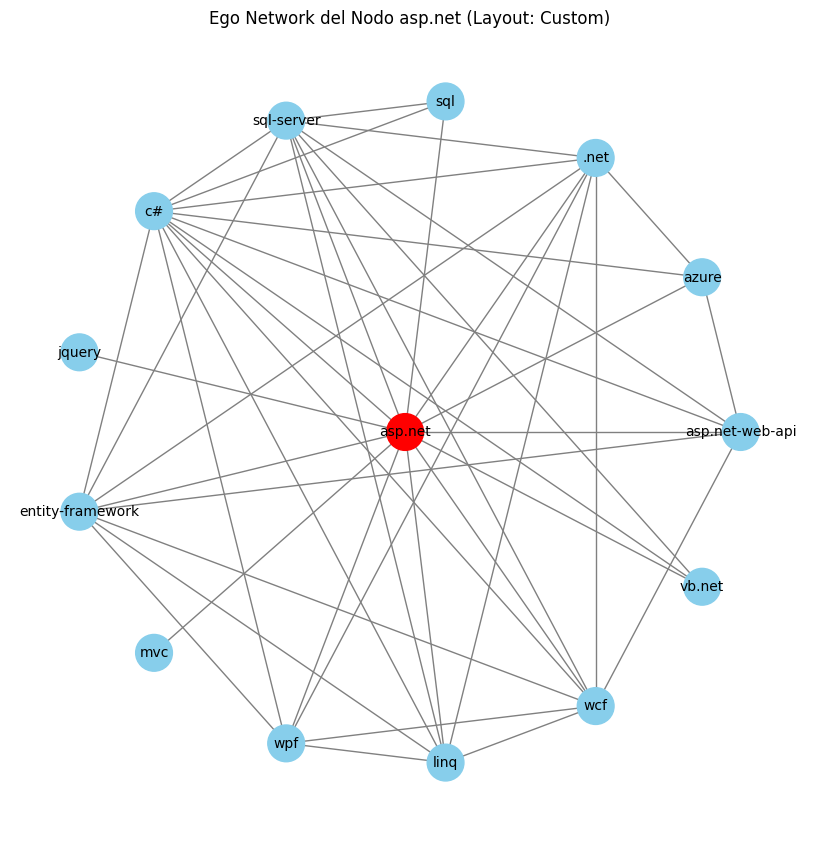

Ego network del nodo asp.net:
- Numero di nodi: 14
- Numero di archi: 44
Distribuzione dei nodi per gruppo nella ego network:
Gruppo Framework e librerie: 13 nodi
Gruppo Front-end web development: 1 nodi
Somma del nodesize dei nodi nella ego network: 1065.65
Somma del peso degli archi (value) nella ego network: 1453.55


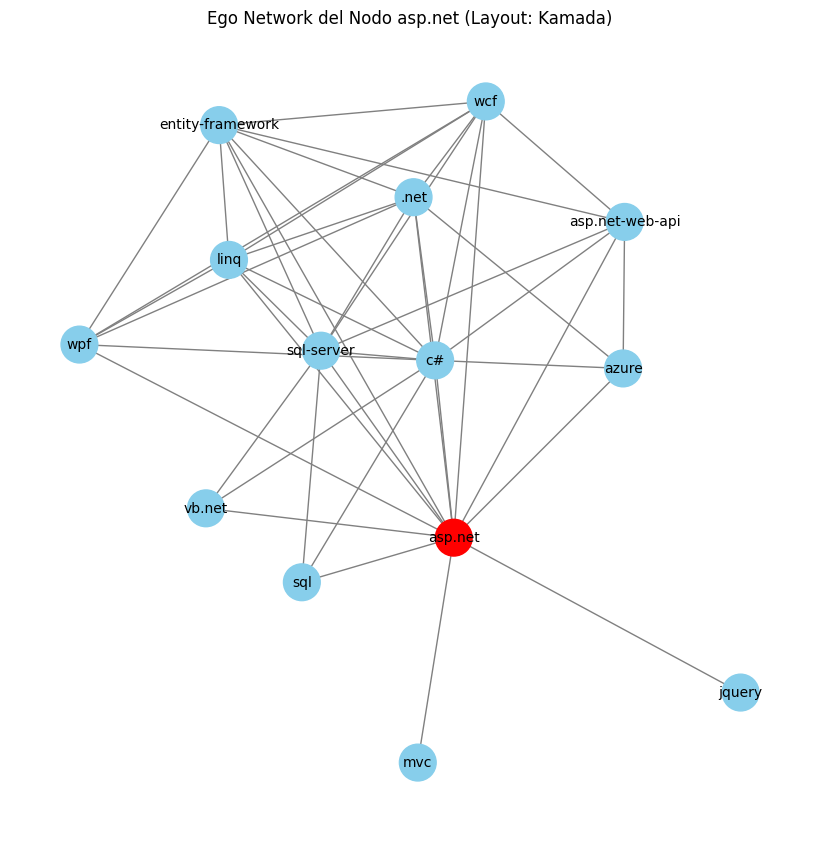

In [ ]:
analyze_and_plot_ego_network(G, nodes_df, 'asp.net')
analyze_and_plot_ego_network(G, nodes_df, 'asp.net', 'kamada')

# Analisi legate al peso degli archi

## Analisi iniziali

In [ ]:
def analyze_edge_weights(G):
    # Estrae i pesi degli archi
    edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

    # Calcola statistiche
    min_weight = min(edge_weights)
    max_weight = max(edge_weights)
    avg_weight = sum(edge_weights) / len(edge_weights)
    print(f"Pesi degli archi: Min = {min_weight}, Max = {max_weight}, Media = {avg_weight:.2f}")

    # Istogramma dei pesi
    plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribuzione dei Pesi degli Archi")
    plt.xlabel("Peso")
    plt.ylabel("Frequenza")
    plt.show()



Pesi degli archi: Min = 20.021932698311588, Max = 126.57112712972764, Media = 34.97


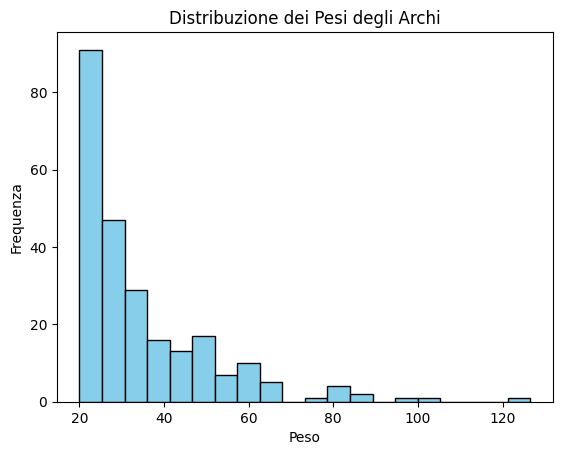

In [ ]:
analyze_edge_weights(G)

## Identificazione di Tag Fortemente o Debolmente Correlati
Visualizza gruppi di tag che si correlano fortemente a un sottoinsieme specifico di altri tag.

In [ ]:
def filter_by_correlation(G, threshold, above=True):
    # Filtra gli archi in base alla soglia
    if above:
        filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]
    else:
        filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] < threshold]

    # Crea il sottografo filtrato
    subgraph = G.edge_subgraph([(u, v) for u, v, d in filtered_edges])
    print(f"Grafo filtrato: {len(subgraph.nodes)} nodi, {len(subgraph.edges)} archi")

    # Calcola la media di nodesize
    nodesize_values = [G.nodes[n].get('nodesize', 0) for n in subgraph.nodes]
    avg_nodesize = sum(nodesize_values) / len(nodesize_values) if nodesize_values else 0

    # Filtra i nodi che superano la media per visualizzare i label in nero
    labels_black = {n: n for n in subgraph.nodes if G.nodes[n].get('nodesize', 0) > avg_nodesize}

    # Identifica i 10 archi da colorare di rosso
    if above:
        top_edges = sorted(filtered_edges, key=lambda x: x[2]['weight'], reverse=True)[:10]
    else:
        top_edges = sorted(filtered_edges, key=lambda x: x[2]['weight'])[:10]
    red_edges = [(u, v) for u, v, d in top_edges]

    # Trova i nodi estremi degli archi rossi
    red_edge_nodes = {n for edge in red_edges for n in edge}

    # Filtra i nodi che non superano la media, ma sono estremi degli archi rossi (label in arancione)
    labels_brown = {n: n for n in red_edge_nodes if n not in labels_black}

    # Posizionamento con Kamada-Kawai
    pos = nx.spring_layout(subgraph, k=1)

    # Disegna il grafo
    plt.figure(figsize=(10, 10))
    nx.draw(
        subgraph, pos,
        with_labels=False,  # Disabilita tutti i label di default
        node_size=60,
        node_color='lightblue',
        edge_color='gray',
        font_size=8
    )

    # Disegna gli archi rossi
    nx.draw_networkx_edges(
        subgraph, pos,
        edgelist=red_edges,
        edge_color='red',
        width=2
    )

    # Disegna solo i label in nero (nodi con nodesize superiore alla media)
    nx.draw_networkx_labels(subgraph, pos, labels_black, font_size=8, font_color='black')

    # Disegna i label in marrone (nodi estremi degli archi rossi senza nodesize superiore alla media)
    nx.draw_networkx_labels(subgraph, pos, labels_brown, font_size=8, font_color='brown')

    plt.title(f"Grafo {'forte' if above else 'debole'} correlazione ({'>'+str(threshold) if above else '<' + str(threshold)})")
    plt.show()


Grafo filtrato: 71 nodi, 79 archi


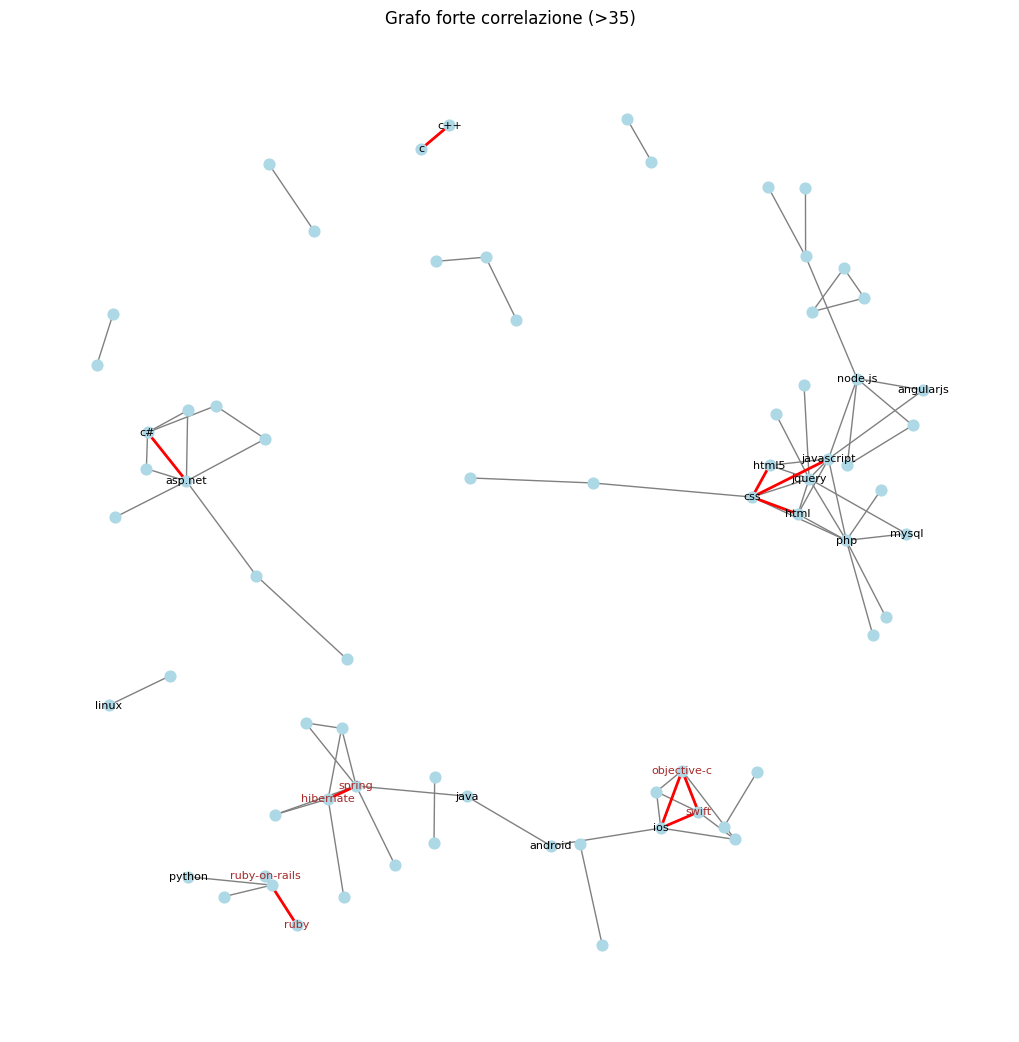

In [ ]:
threshold = 35
filter_by_correlation(G, threshold)

Grafo filtrato: 106 nodi, 166 archi


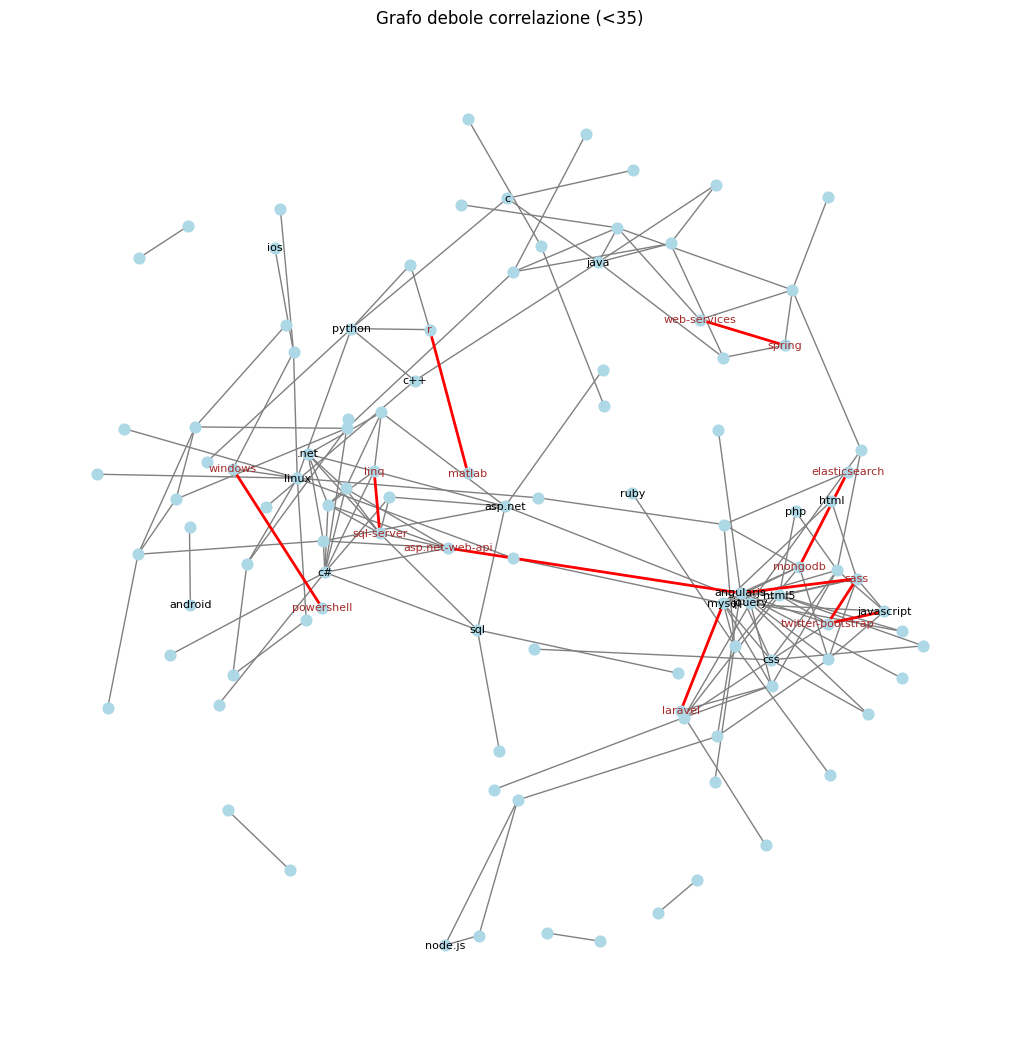

In [ ]:
filter_by_correlation(G, threshold, False)

## Maximum Spanning Tree (Albero ricoprente massimo)
Calcola il Minimum Spanning Tree (MST) per identificare il sottoinsieme di connessioni più forti necessarie a collegare tutti i tag.

In [ ]:
def plot_maximum_spanning_tree(G):
    # Calcola il Maximum Spanning Tree
    mst = nx.maximum_spanning_tree(G, weight='weight')
    print(f"MST: {len(mst.nodes)} nodi, {len(mst.edges)} archi")

    # Separa gli archi in base al peso
    edges_greater_35 = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] > 35]
    edges_less_equal_35 = [(u, v) for u, v, d in mst.edges(data=True) if d['weight'] <= 35]

    print(f"Numero di archi con peso > 35: {len(edges_greater_35)}")
    print(f"Numero di archi con peso <= 35: {len(edges_less_equal_35)}")


    pos = nx.kamada_kawai_layout(G)

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(
        mst, pos,
        node_size=80,
        node_color='lightblue'
    )

    # Disegna gli archi con peso maggiore di 35 in rosso
    nx.draw_networkx_edges(
        mst, pos,
        edgelist=edges_greater_35,
        edge_color='red',
        width=2
    )

    # Disegna gli archi con peso minore o uguale a 35 in blu
    nx.draw_networkx_edges(
        mst, pos,
        edgelist=edges_less_equal_35,
        edge_color='blue',
        width=2
    )

    # Disegna i label dei nodi
    nx.draw_networkx_labels(
        mst, pos,
        font_size=8,
        font_color='black'
    )


    plt.title("Maximum Spanning Tree (MST) con archi colorati per peso")
    plt.show()


MST: 115 nodi, 109 archi
Numero di archi con peso > 35: 56
Numero di archi con peso <= 35: 53


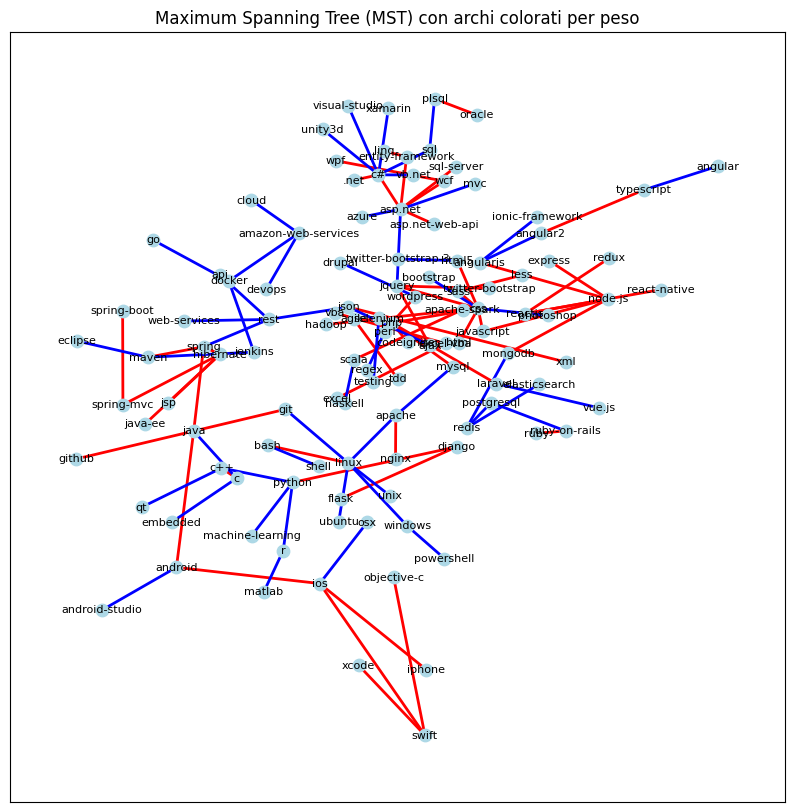

In [ ]:
plot_maximum_spanning_tree(G)

## Percorso minimo tra due nodi

In [ ]:
def dfs_max_weighted_path(G, source, target, k, path=[], max_ratio=-float('inf'), max_path=[]):
    # Controllo sui passi
    if len(path) > k:
        return max_path, max_ratio

    path.append(source)

    # Controlla se il target è raggiunto
    if source == target:
        current_weight = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        current_ratio = current_weight / (len(path) - 1)  # Calcola il rapporto peso/passi
        if current_ratio > max_ratio:
            max_ratio = current_ratio
            max_path = path.copy()
        path.pop()
        return max_path, max_ratio

    # Esplora i nodi vicini connessi
    for neighbor in G.neighbors(source):
        if neighbor not in path:
            max_path, max_ratio = dfs_max_weighted_path(G, neighbor, target, k, path, max_ratio, max_path)

    path.pop()
    return max_path, max_ratio

def shortest_max_weighted_path(G, source, target, k):
    try:
        max_path, max_ratio = dfs_max_weighted_path(G, source, target, k)

        if max_path:
            print(f"Cammino con il rapporto peso/passi massimo tra {source} e {target} in massimo {k} passi\n ha una lunghezza di {str(len(max_path)-1)} ed è composto dai nodi: {max_path}, rapporto peso/passi = {max_ratio}")
        else:
            print(f"Nessun cammino tra {source} e {target} che soddisfa i criteri di massimo {k} passi e senza passare due volte nello stesso nodo.")
    except Exception as e:
        print(f"Errore: {e}")

In [ ]:
shortest_max_weighted_path(G, 'mysql', 'linux', 5)

Cammino con il rapporto peso/passi massimo tra mysql e linux in massimo 5 passi
 ha una lunghezza di 3 ed è composto dai nodi: ['mysql', 'apache', 'nginx', 'linux'], rapporto peso/passi = 32.92049548656498
